#                                 Financial Data Analysis of Airlines

Team 4

Amrita Chandrasekar(NH53017)

Lokesh Reddy Kuppireddy(GR68330)

Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/Users/ammu/Desktop/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import yfinance as yf

# Listing five airline stock tickers
airlines = ['LUV', 'UAL', 'AAL', 'RYAAY', 'JBLU','^GSPC']

# Defining the start and end dates for stock data
start_date = '2019-01-01'
end_date = '2024-01-01'

# Downloading stock price data for the airlines
airline_stock_prices = yf.download(airlines, start=start_date, end=end_date, interval='1d')['Close']

[*********************100%%**********************]  6 of 6 completed


In [4]:
airline_stock_prices.head()

Ticker            AAL       JBLU        LUV      RYAAY        UAL        ^GSPC
Date                                                                          
2019-01-02  32.480000  16.200001  47.139999  71.889999  84.180000  2510.030029
2019-01-03  30.059999  15.930000  45.610001  70.629997  80.000000  2447.889893
2019-01-04  32.040001  16.549999  47.860001  72.820000  82.680000  2531.939941
2019-01-07  32.950001  16.690001  47.869999  73.000000  83.230003  2549.689941
2019-01-08  32.419998  16.850000  47.540001  71.459999  82.379997  2574.409912

Summary Statistics

In [95]:
airline_stock_prices.describe()

Ticker          AAL         JBLU          LUV        RYAAY          UAL  \
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean      19.277631    12.844269    43.375246    88.637043    53.287504   
std        7.000581     4.842476    10.095553    18.808973    19.375327   
min        9.040000     3.690000    22.230000    47.509998    19.920000   
25%       13.835000     8.202500    34.757500    72.910002    40.027500   
50%       16.835000    13.880000    43.965000    87.759998    46.465000   
75%       23.437500    16.980000    51.932499   105.857500    57.700000   
max       36.930000    21.639999    64.099998   135.740005    95.279999   

Ticker         GSPC  
count   1258.000000  
mean    3755.831541  
std      634.050177  
min     2237.399902  
25%     3128.659973  
50%     3907.449951  
75%     4305.090088  
max     4796.560059

American Airlines (AAL):

AAL has a relatively high standard deviation (7.00 dollar) compared to some competitors. This suggests AAL's stock price experienced more significant fluctuations during the period.While the average price (19.28 dollar) sits below the peak (36.93 dollar), it's higher than the 25th percentile (13.84 dollar). This indicates AAL's price has potentially recovered from some lows but hasn't reached its previous highs.

Southwest Airlines (LUV):

LUV boasts the second-lowest standard deviation (10.09 dollar), suggesting its stock price exhibited less volatility compared to some airlines.LUV's average price (43.38 dollar) is the third-highest, and its median price (46.47 dollar) is even higher. This suggests LUV's stock price generally held its value well throughout the period.

JetBlue Airways (JBLU):

JBLU's standard deviation (4.84 dollar) falls on the lower end, indicating its price may have been more stable than some. However, the gap between the average (12.84 dollar) and the maximum (21.64 dollar) suggests periods of significant price swings.

Ryanair Holdings (RYAAY):

RYAAY has the lowest average (8.64 dollar) and median (8.20 dollar) price, potentially indicating a lower overall market valuation compared to other airlines.RYAAY's standard deviation is the highest (18.81 dollar), suggesting significant price fluctuations throughout the period. This could be due to various factors impacting the airline or the market.

# Data Preprocessing

In [6]:
airline_stock_prices.isnull().sum()

Ticker
AAL      0
JBLU     0
LUV      0
RYAAY    0
UAL      0
^GSPC    0
dtype: int64

Data is cleaned and it does not have any null values

# Exploratory Data Analysis

Airline Stock Prices Over Time

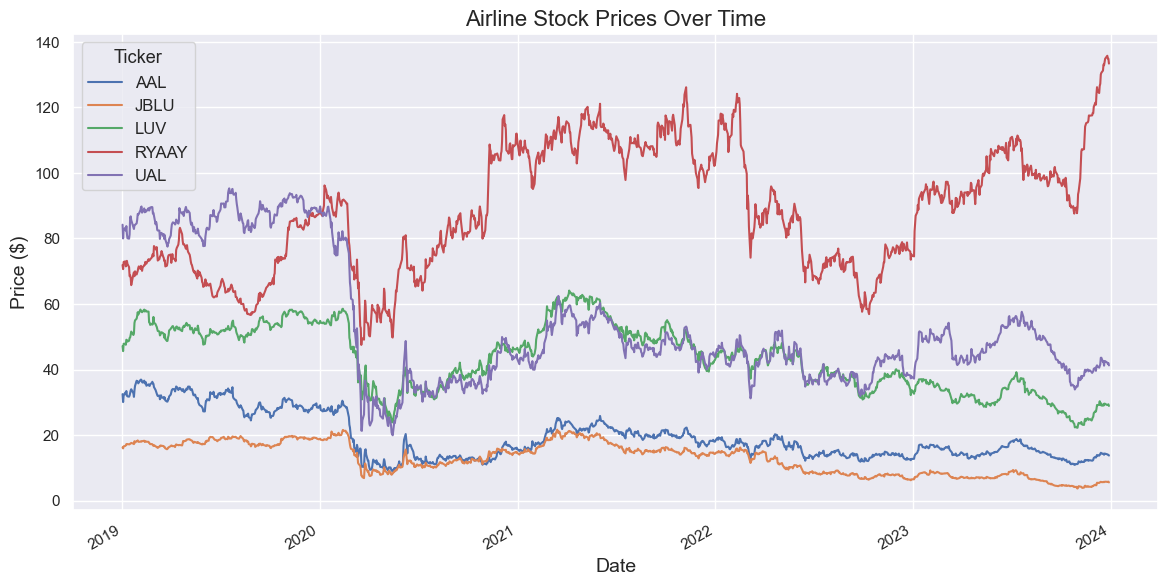

In [7]:
airline_stock_prices.iloc[:, :-1].plot(figsize=(14, 7))
plt.title('Airline Stock Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='12')
plt.grid(True)
plt.show()

Impact of COVID-19 Pandemic:

There was a significant decline in stock prices for all five airlines in 2020. This steep drop likely reflects the negative impact of the COVID-19 pandemic on the airline industry. Travel restrictions, lockdowns, and reduced demand for air travel due to health concerns significantly impacted airline revenue and profitability.

Post-Pandemic Recovery:

Since 2020, the stock prices of all five airlines have shown some recovery. This suggests a potential rebound in the industry as travel restrictions eased and passenger demand started to pick up.


It's important to note that despite the recovery, the stock prices remain below their pre-pandemic levels. This indicates that the industry hasn't fully recovered from the pandemic's effects.


UAL (presumably United Airlines) has the highest stock price among the five airlines displayed in the graph. This could suggest that the market perceives UAL to perform better.

RYAAY has the lowest stock price on the graph. This might indicate the market's perception of RYAAY's financial performance is less favorable compared to the other airlines.

Distribution of Airline Stock Prices

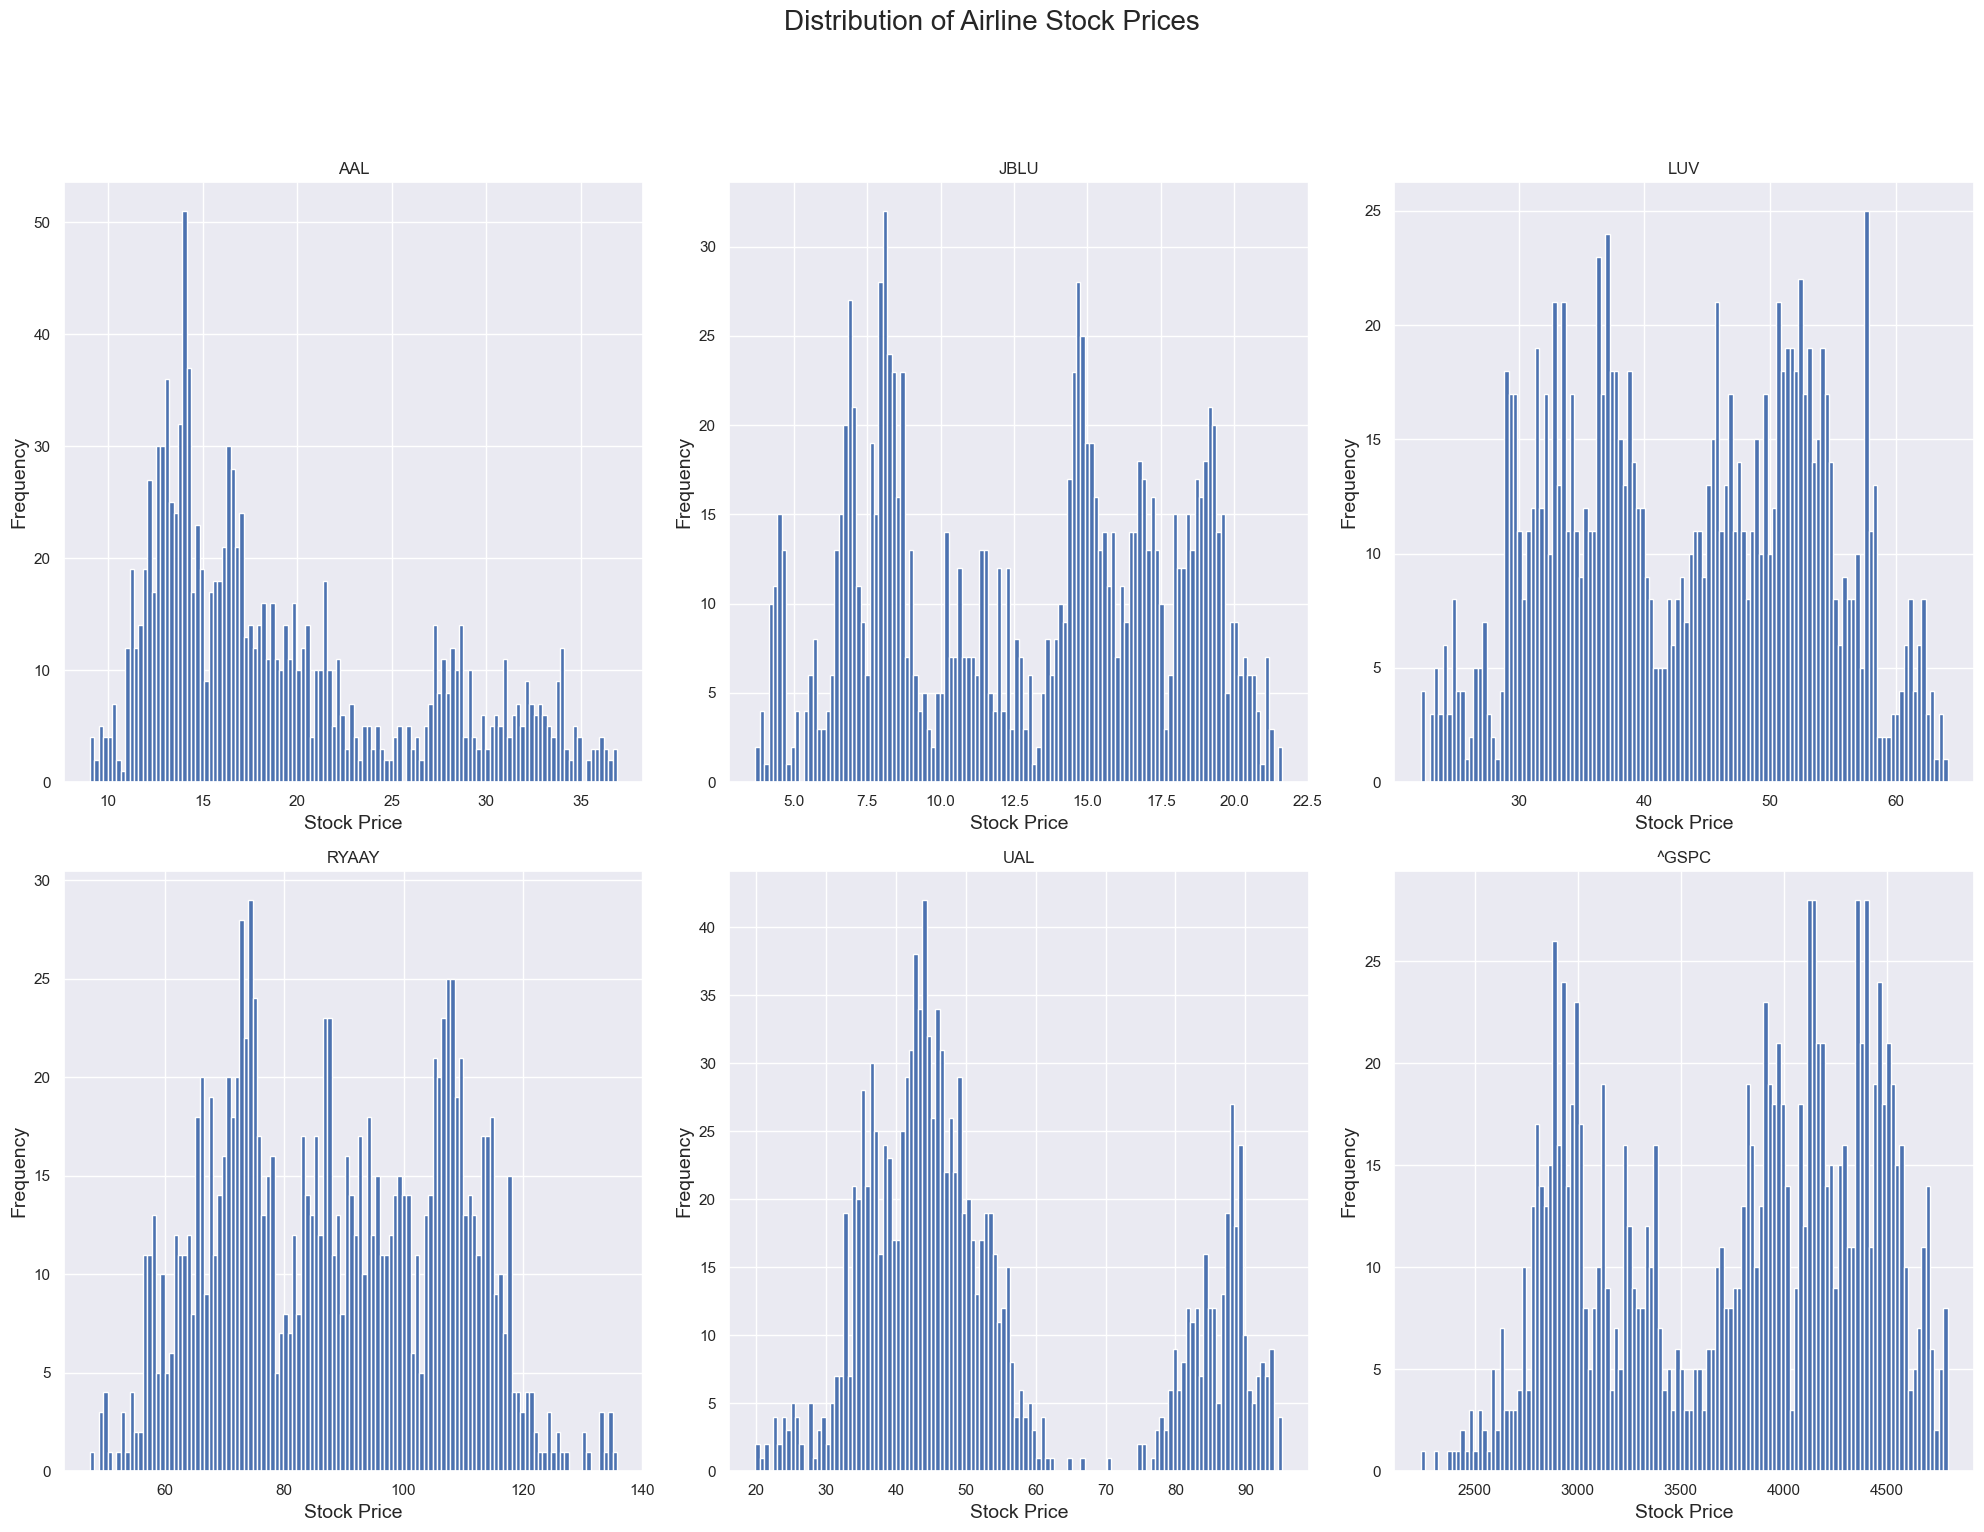

In [8]:
# Determining the size of layout
n = len(airline_stock_prices.columns)
# Number of columns in the output grid
cols = 3  
rows = -(-n // cols)
fig, axs = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle('Distribution of Airline Stock Prices', fontsize=20, y=1.02)

# Flattening the array of axes for easy iteration
axs = axs.flatten()

for i, column in enumerate(airline_stock_prices.columns):
# Plotting histogram for each column
    axs[i].hist(airline_stock_prices[column], bins=120)
    axs[i].set_title(column)
    axs[i].set_xlabel('Stock Price', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)

# Not printing any unused subplots
for i in range(n, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Daily Returns Analysis

In [9]:
daily_returns=airline_stock_prices.pct_change()

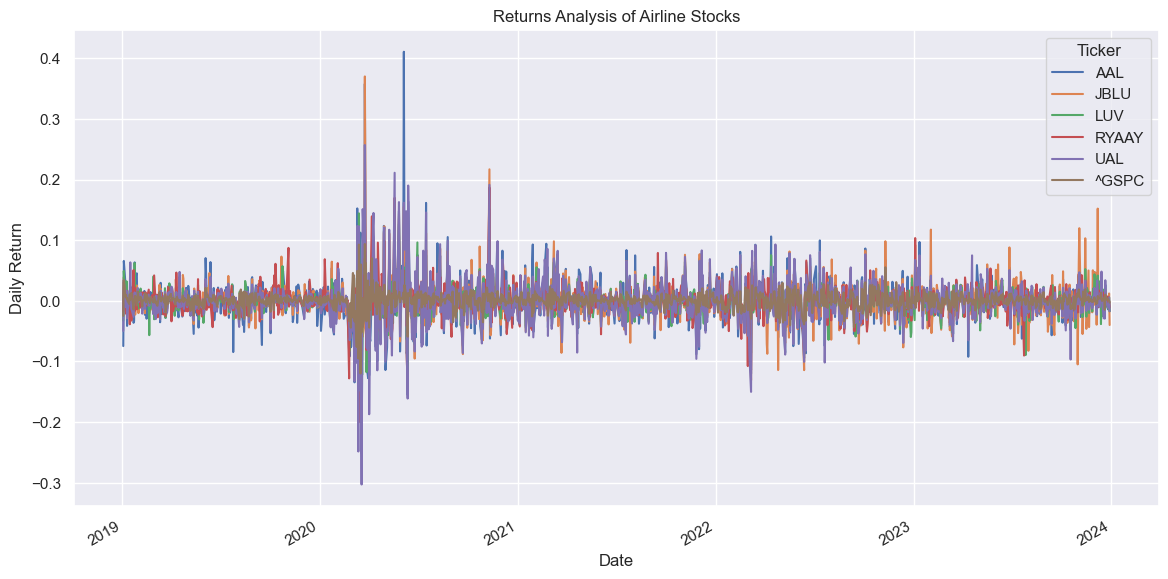

In [10]:
daily_returns.plot(figsize=(14, 7))
plt.title('Returns Analysis of Airline Stocks')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.show()

There are noticeable spikes throughout the time series for each stock, indicating periods of high volatility. This can be due to a variety of factors, including economic conditions, oil prices, and other industry-specific news.

By comparing the lines, we can understand how each airline's stock return fluctuated relative to the others and to the market index on a day-to-day basis.

The S&P 500 index line ('GSPC') provides a baseline to assess whether the airlines are moving in tandem with the overall market or are experiencing industry-specific trends.

Sharp spikes or drops could be indicative of specific events affecting the airline industry or the broader market could correspond to adverse events like the COVID-19 pandemic which had a notable impact on travel and airline stocks.This is because we wanted to cosndier the arilines stocks data of before covid ,durng covid and after covid inorder to see noticeable changes.

The movement of airline stocks in relation to the S&P 500 line could indicate how closely they are correlated with the market.They tend to move together almost, implying  stocks might have a high beta (market risk).

Correlation Analysis of Airline Stocks

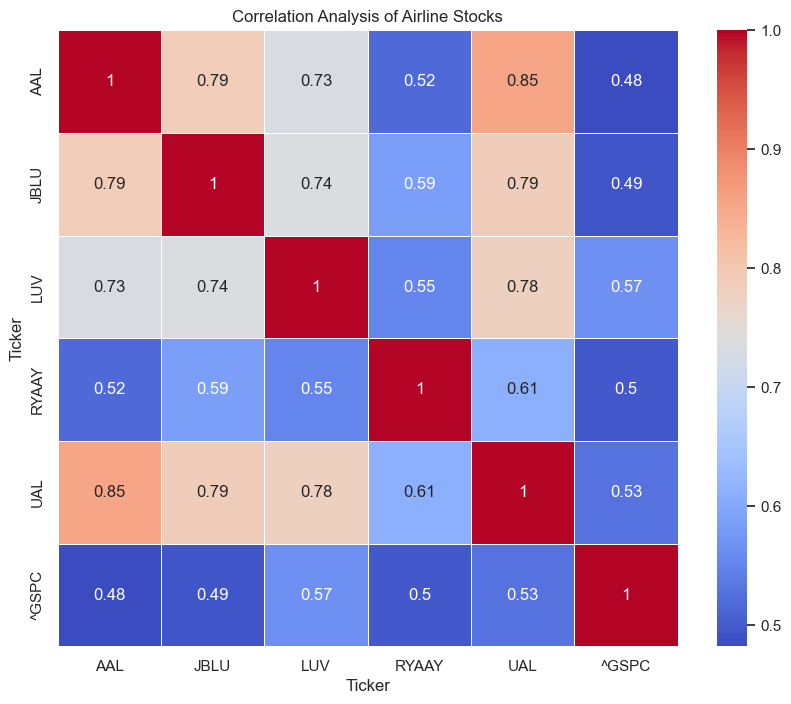

In [11]:
correlation_matrix = daily_returns.corr()
# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Analysis of Airline Stocks')
plt.show()

The image is a heatmap displaying the correlation coefficients between the stock prices of several airlines, including American Airlines (AAL), JetBlue Airways (JBLU), Southwest Airlines (LUV), Ryanair (RYAAY), and United Airlines (UAL), as well as their correlation to the S&P 500 Index (^GSPC). The color scale ranges from blue (indicating a lower correlation) to red (indicating a higher correlation), with the highest observed correlation being 0.85. Diagonal cells, representing each stock's correlation with itself, show a perfect correlation of 1. The heatmap suggests moderate to strong positive correlations within airline stocks and a moderate positive correlation with the broader market index. This implies that, generally, these airline stocks tend to move together and are somewhat in step with the market, although individual airline stocks also show some degree of independent movement.

#### Volatility Analysis of Airline Stocks

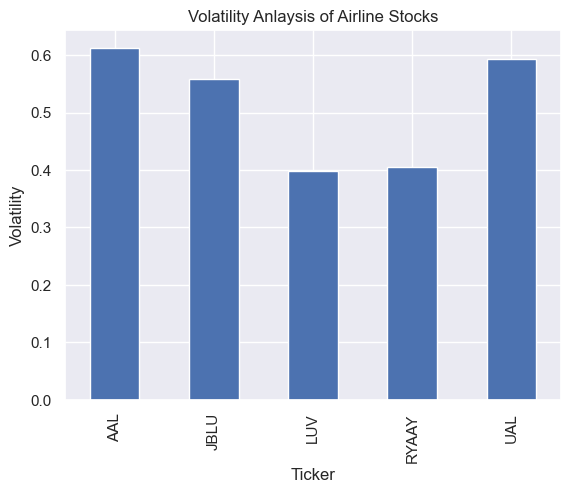

In [12]:
# Determining the annual standard deviation
volatility = daily_returns.iloc[:, :-1].std() * np.sqrt(252) 
volatility.plot(kind='bar')
plt.title('Volatility Anlaysis of Airline Stocks')
plt.ylabel('Volatility')
plt.show()

AAL (American Airlines) and UAL (United Airlines) appear to have the highest annualized volatility among the selected airline stocks, indicating that their stock prices have had larger fluctuations over the period measured. This suggests higher risk associated with these stocks.

LUV (Southwest Airlines) and RYAAY (Ryanair) exhibit lower volatility compared to AAL and UAL, which might indicate that their stock prices were relatively more stable.
JBLU (JetBlue Airways) shows a volatility level that is in between the highest (AAL, UAL) and the lowest (LUV, RYAAY).


Investors who likely to avoid risks might prefer to invest in the airlines with lower volatility (LUV and RYAAY).On the other hand risk-tolerant investors, or those looking for higher potential returns which often come with higher risk, might be more interested in AAL and UAL given their higher volatility.

#### Pairwise Daily Returns of Airlines

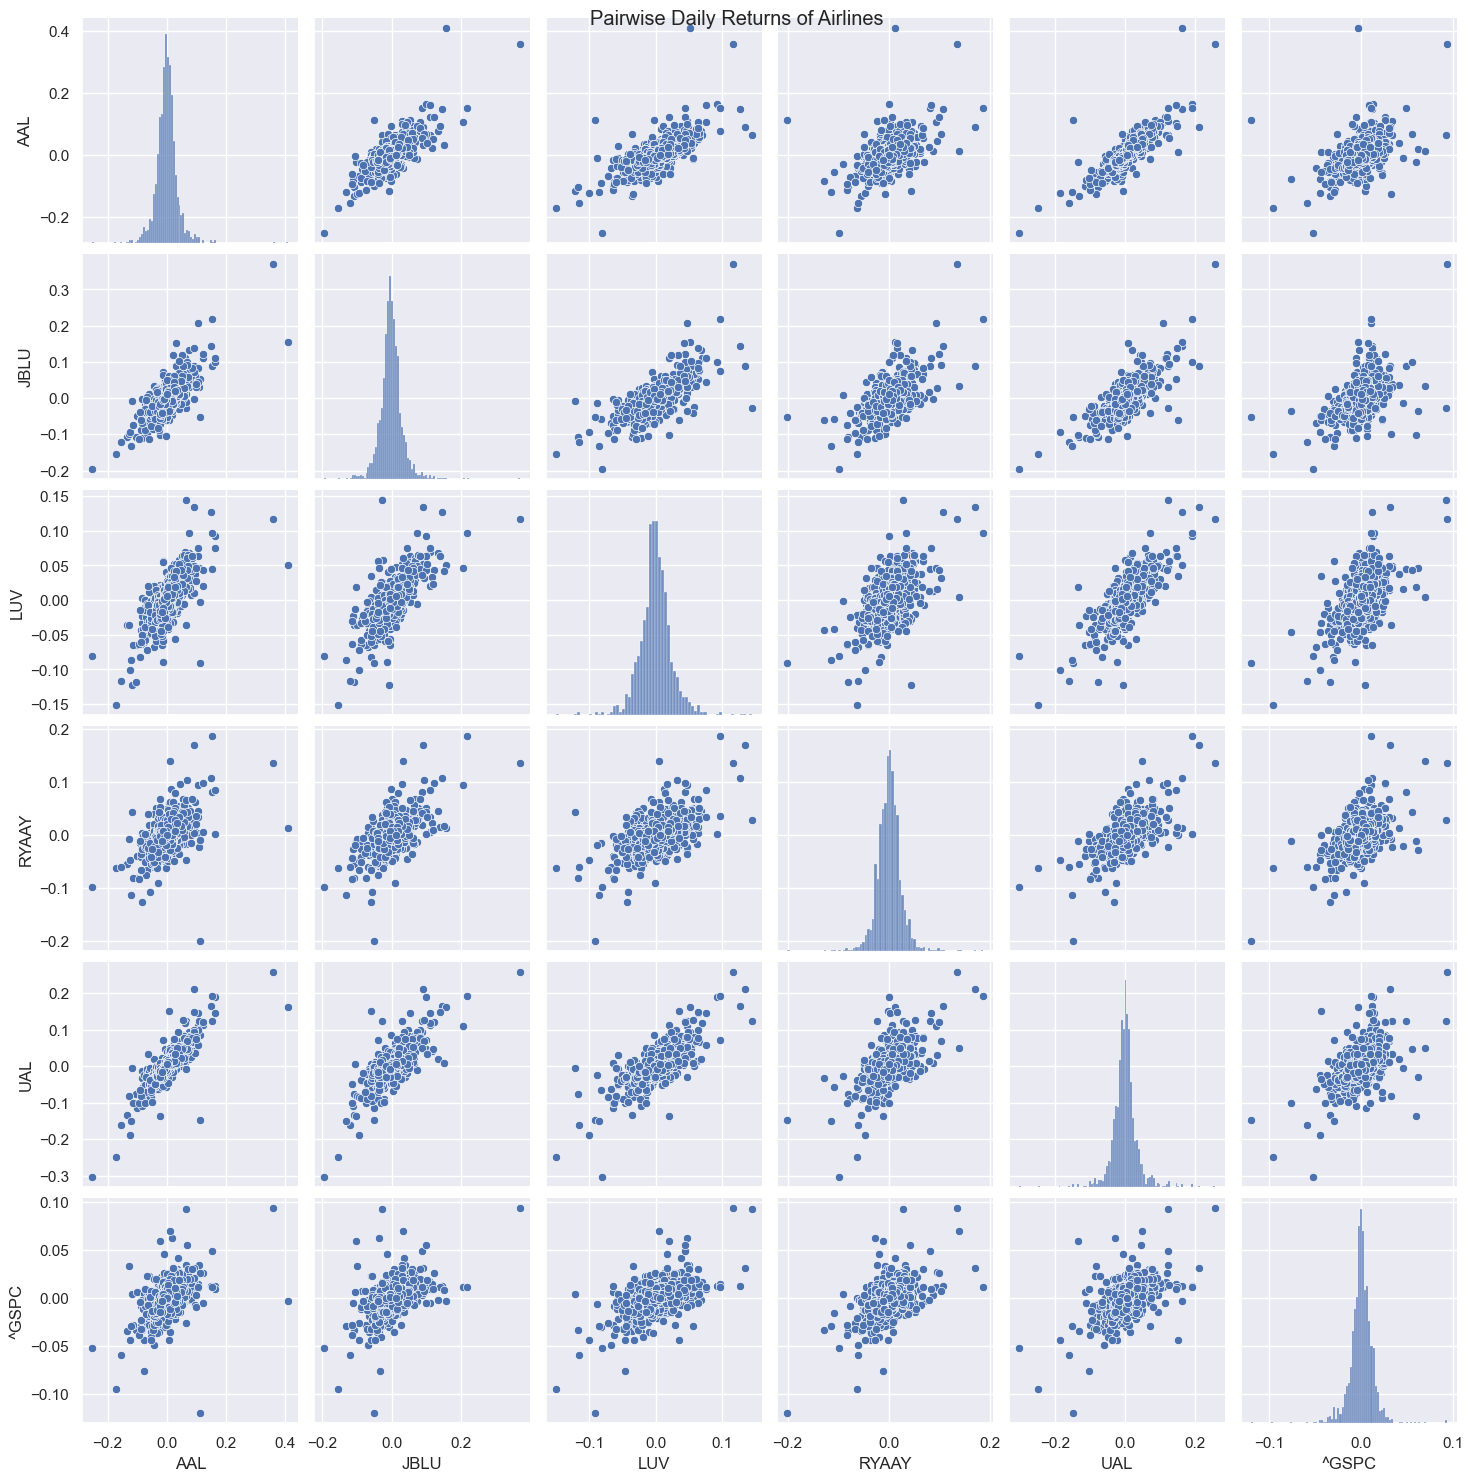

In [13]:
sns.pairplot(daily_returns.dropna())
plt.suptitle('Pairwise Daily Returns of Airlines', verticalalignment='baseline')
plt.show()

#### STATISTICAL ANALYSIS

In [14]:
daily_returns=daily_returns.dropna()

Mean

In [15]:
mean=daily_returns.mean()

In [16]:
mean

Ticker
AAL      0.000040
JBLU    -0.000247
LUV     -0.000076
RYAAY    0.000818
UAL      0.000134
^GSPC    0.000602
dtype: float64

Ryanair (RYAAY) leads with a mean return of 0.000818, while JetBlue (JBLU) and Southwest (LUV) show slightly negative mean returns of -0.000247 and -0.000076, respectively.

Standard Deviation

In [17]:
std_deviation=daily_returns.std()

In [18]:
std_deviation

Ticker
AAL      0.038583
JBLU     0.035204
LUV      0.025038
RYAAY    0.025580
UAL      0.037316
^GSPC    0.013432
dtype: float64

American Airlines (AAL) and United Airlines (UAL) exhibit higher standard deviations of 0.038583 and 0.037316 respectively, indicating greater variability in returns, while Southwest (LUV) and Ryanair (RYAAY) show lower standard deviations of 0.025038 and 0.025580 respectively, suggesting relatively more stable returns.

In [19]:
len(airline_stock_prices)

1258

Z score and Confidence Interval

In [20]:
from scipy import stats
# Z-score for 95% confidence
z_score = stats.norm.ppf(0.975)  # Two-tailed test for 95% confidence

# Calculate the margin of error
margin_error = z_score * (std_deviation / 1258)

# Lower and upper bounds of the 95% confidence interval
ci_lower = mean - margin_error
ci_upper = mean + margin_error

# Combine everything into a DataFrame for nicer display
statistics_df = pd.DataFrame({
    '95% CI Lower': ci_lower,
    '95% CI Upper': ci_upper
})

print(statistics_df)

        95% CI Lower  95% CI Upper
Ticker                            
AAL        -0.000020      0.000100
JBLU       -0.000302     -0.000192
LUV        -0.000115     -0.000037
RYAAY       0.000778      0.000858
UAL         0.000076      0.000193
^GSPC       0.000581      0.000622


The 95% confidence intervals for daily returns suggest that JetBlue (JBLU) has the most narrow range from -0.000302 to -0.000192, followed by Southwest (LUV) with a range from -0.000115 to -0.000037. Ryanair (RYAAY) displays the widest range of 0.000778 to 0.000858, indicating higher uncertainty compared to other stocks and the S&P 500 index.

# Main Financial Concepts

# Return

In [21]:
# Annualizing the returns
annual_returns = daily_returns.mean() * 252
print(annual_returns)

Ticker
AAL      0.010167
JBLU    -0.062182
LUV     -0.019150
RYAAY    0.206151
UAL      0.033867
^GSPC    0.151584
dtype: float64


AAL (American Airlines) has a positive excess return of approximately 1.02%, indicating that it performed better than the benchmark.

JBLU (JetBlue) has a negative excess return of approximately -6.22%, suggesting that it underperformed compared to the benchmark.

LUV (Southwest Airlines) also has a negative excess return of approximately -1.92%, indicating underperformance relative to the benchmark.

RYAAY (Ryanair Holdings) stands out with a relatively high positive excess return of approximately 20.62%, signifying significant outperformance compared to the benchmark.

UAL (United Airlines) has a positive excess return of approximately 3.39%, indicating better performance compared to the benchmark.

^GSPC represents the benchmark itself, which has an excess return of approximately 15.16%.

Overall, this analysis suggests that RYAAY had the highest excess return, significantly outperforming the benchmark, while JBLU and LUV had negative excess returns, indicating underperformance. AAL and UAL also had positive excess returns, with AAL performing slightly better than UAL.

# Risk

In [22]:
#Annualizing the risk
annual_risk = daily_returns.std() * np.sqrt(252)
print(annual_risk)

Ticker
AAL      0.612494
JBLU     0.558842
LUV      0.397472
RYAAY    0.406074
UAL      0.592375
^GSPC    0.213234
dtype: float64


AAL (American Airlines): With an annualized risk of 0.612, AAL exhibits relatively high volatility compared to the other assets in the list. This suggests that AAL's returns are subject to significant fluctuations over time, indicating higher risk associated with investing in AAL.

JBLU (JetBlue Airways): JBLU has an annualized risk of 0.559, which is slightly lower than AAL but still relatively high. Investors should be aware of the volatility in JBLU's returns, although it may be lower compared to AAL.

LUV (Southwest Airlines): LUV has an annualized risk of 0.397, indicating moderate volatility. While LUV's returns are subject to fluctuations, the risk level is comparatively lower than AAL and JBLU.

RYAAY (Ryanair Holdings): RYAAY has an annualized risk of 0.406, which is similar to LUV's risk level. Investors should expect moderate volatility in RYAAY's returns.

UAL (United Airlines Holdings): UAL exhibits a relatively high annualized risk of 0.592, similar to AAL. Investors should consider the volatility in UAL's returns when making investment decisions.

^GSPC (S&P 500 Index): The S&P 500 Index (^GSPC) has an annualized risk of 0.213, which serves as a benchmark for the broader market. Comparatively, the risk associated with investing in the S&P 500 Index is lower than individual airline stocks, indicating that investing in the overall market may offer relatively lower volatility.

# Covariance

In [23]:
# Calculating covariance matrix of daily returns
covariance_matrix = daily_returns.cov() * 252
# Display the results
print(covariance_matrix)

Ticker       AAL      JBLU       LUV     RYAAY       UAL     ^GSPC
Ticker                                                            
AAL     0.375149  0.270178  0.178393  0.128888  0.310104  0.063011
JBLU    0.270178  0.312305  0.163550  0.133320  0.260673  0.058809
LUV     0.178393  0.163550  0.157984  0.089007  0.183747  0.048038
RYAAY   0.128888  0.133320  0.089007  0.164896  0.146811  0.043056
UAL     0.310104  0.260673  0.183747  0.146811  0.350908  0.066652
^GSPC   0.063011  0.058809  0.048038  0.043056  0.066652  0.045469


Higher values in the covariance matrix indicate stronger covariance between the corresponding assets or indices.

AAL (American Airlines) has relatively high covariances with other airline stocks like JBLU (JetBlue) and UAL (United Airlines), indicating that they tend to move together.

RYAAY (Ryanair Holdings) has relatively lower covariances with other airline stocks, suggesting that its movements may be somewhat independent of other airlines.

The covariance between each asset or index and the overall market (^GSPC) varies, with generally higher covariances for airline stocks compared to the market.

# Correlation

In [24]:
# Calculating correlation matrix of daily returns
correlation_matrix = daily_returns.corr()
print(correlation_matrix)

Ticker       AAL      JBLU       LUV     RYAAY       UAL     ^GSPC
Ticker                                                            
AAL     1.000000  0.789332  0.732772  0.518209  0.854692  0.482458
JBLU    0.789332  1.000000  0.736299  0.587489  0.787428  0.493511
LUV     0.732772  0.736299  1.000000  0.551456  0.780400  0.566794
RYAAY   0.518209  0.587489  0.551456  1.000000  0.610320  0.497248
UAL     0.854692  0.787428  0.780400  0.610320  1.000000  0.527668
^GSPC   0.482458  0.493511  0.566794  0.497248  0.527668  1.000000


AAL (American Airlines) has a relatively strong positive correlation with other airlines like JBLU (JetBlue) and UAL (United Airlines), as well as with the overall market represented by ^GSPC (S&P 500). This suggests that movements in the stock prices of AAL tend to be positively correlated with those of other airlines and the overall market.

RYAAY (Ryanair Holdings) shows weaker correlations with other airlines compared to AAL, indicating that it may not move perfectly in line with other airline stocks.

The correlation between the airline stocks and the overall market (^GSPC) varies but generally tends to be positive, indicating some level of co-movement with market trends.

# Risk Return Ratio

In [25]:
# Assuming 'daily_returns' is already calculated for each stock
rolling_window = 252  # 252 trading days for a yearly rolling measure

# Calculating rolling return (sum over the past year) and rolling risk (standard deviation over the past year)
rolling_returns = daily_returns.rolling(window=rolling_window).mean() * 252
rolling_risk = daily_returns.rolling(window=rolling_window).std() * np.sqrt(252)

In [26]:
rolling_returns

Ticker           AAL      JBLU       LUV     RYAAY       UAL     ^GSPC
Date                                                                  
2019-01-03       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-07       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-08       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-09       NaN       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...
2023-12-22  0.156088 -0.012666 -0.164021  0.584968  0.152852  0.212586
2023-12-26  0.178182  0.013992 -0.144738  0.619139  0.160268  0.231269
2023-12-27  0.157735 -0.000470 -0.160446  0.613138  0.149076  0.226832
2023-12-28  0.171182  0.022641 -0.095053  0.620453  0.159777  0.231252
2023-12-29  0.170775  0.012630 -0.060509  0.642391  0.166682  0.240446

[1257 rows x 6 columns]

In [27]:
#removing null values
rolling_returns=rolling_returns.dropna()

In [28]:
#checking if null values are removed
rolling_returns

Ticker           AAL      JBLU       LUV     RYAAY       UAL     ^GSPC
Date                                                                  
2020-01-02 -0.046978  0.184650  0.177763  0.251141  0.090423  0.268698
2020-01-03 -0.021972  0.184376  0.201285  0.251191  0.119575  0.286395
2020-01-06 -0.099775  0.140610  0.147906  0.210492  0.083800  0.255593
2020-01-07 -0.131837  0.128362  0.150653  0.225637  0.066543  0.245779
2020-01-08 -0.092975  0.123664  0.159020  0.255106  0.082864  0.240986
...              ...       ...       ...       ...       ...       ...
2023-12-22  0.156088 -0.012666 -0.164021  0.584968  0.152852  0.212586
2023-12-26  0.178182  0.013992 -0.144738  0.619139  0.160268  0.231269
2023-12-27  0.157735 -0.000470 -0.160446  0.613138  0.149076  0.226832
2023-12-28  0.171182  0.022641 -0.095053  0.620453  0.159777  0.231252
2023-12-29  0.170775  0.012630 -0.060509  0.642391  0.166682  0.240446

[1006 rows x 6 columns]

In [29]:
rolling_risk

Ticker           AAL      JBLU       LUV     RYAAY       UAL     ^GSPC
Date                                                                  
2019-01-03       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-07       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-08       NaN       NaN       NaN       NaN       NaN       NaN
2019-01-09       NaN       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...
2023-12-22  0.353905  0.498770  0.320584  0.307481  0.362940  0.133117
2023-12-26  0.352292  0.497774  0.319320  0.306058  0.362624  0.132270
2023-12-27  0.352230  0.497666  0.318800  0.306170  0.362728  0.132178
2023-12-28  0.351920  0.497697  0.313323  0.306011  0.362721  0.132085
2023-12-29  0.351940  0.498400  0.309539  0.304257  0.362320  0.131500

[1257 rows x 6 columns]

In [30]:
#removing null values
rolling_risk=rolling_risk.dropna()

In [31]:
#checking if null values are removed
rolling_risk

Ticker           AAL      JBLU       LUV     RYAAY       UAL     ^GSPC
Date                                                                  
2020-01-02  0.355530  0.250276  0.230720  0.264947  0.230420  0.124936
2020-01-03  0.351134  0.250295  0.228514  0.264943  0.225866  0.122493
2020-01-06  0.345029  0.247401  0.223307  0.263437  0.223434  0.117898
2020-01-07  0.343830  0.247311  0.223319  0.263966  0.223610  0.117806
2020-01-08  0.344260  0.247183  0.223194  0.263145  0.223438  0.117547
...              ...       ...       ...       ...       ...       ...
2023-12-22  0.353905  0.498770  0.320584  0.307481  0.362940  0.133117
2023-12-26  0.352292  0.497774  0.319320  0.306058  0.362624  0.132270
2023-12-27  0.352230  0.497666  0.318800  0.306170  0.362728  0.132178
2023-12-28  0.351920  0.497697  0.313323  0.306011  0.362721  0.132085
2023-12-29  0.351940  0.498400  0.309539  0.304257  0.362320  0.131500

[1006 rows x 6 columns]

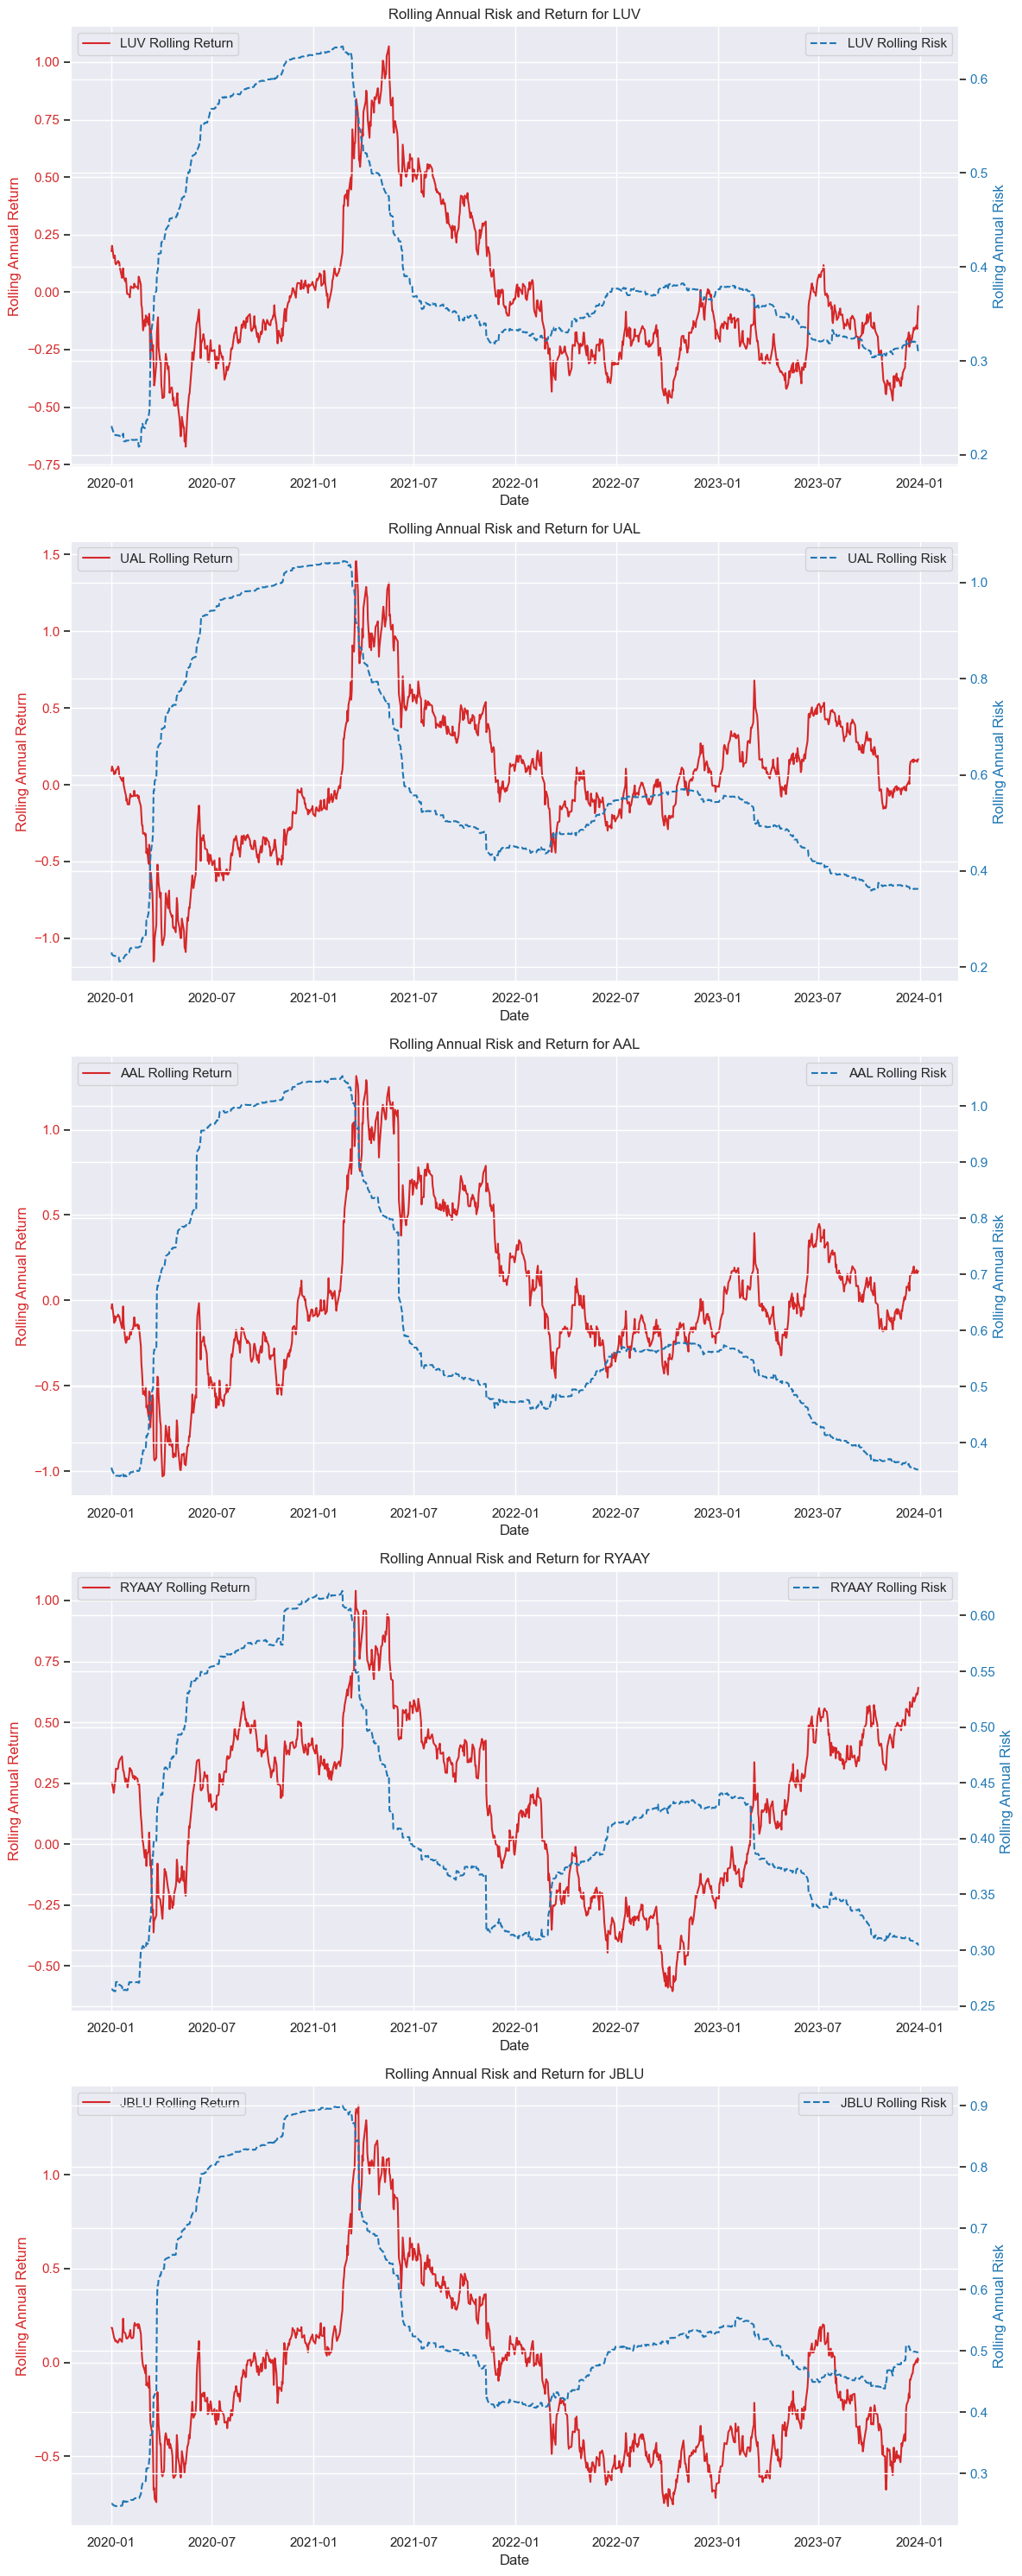

In [32]:
#five airlines
airlines = ['LUV', 'UAL', 'AAL', 'RYAAY', 'JBLU']

fig, axes = plt.subplots(len(airlines), figsize=(12, 6*len(airlines)))

for i, airline in enumerate(airlines):
    color = 'tab:red'
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Rolling Annual Return', color=color)
    axes[i].plot(rolling_returns.index, rolling_returns[airline], color=color, label=f'{airline} Rolling Return')
    axes[i].tick_params(axis='y', labelcolor=color)

    ax2 = axes[i].twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Rolling Annual Risk', color=color)
    ax2.plot(rolling_risk.index, rolling_risk[airline], color=color, linestyle='--', label=f'{airline} Rolling Risk')
    ax2.tick_params(axis='y', labelcolor=color)

    axes[i].set_title(f'Rolling Annual Risk and Return for {airline}')
    axes[i].legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout() 
plt.show()

LUV (Southwest Airlines)
The red line represents the rolling annual return for Southwest Airlines (LUV), showing how the return has fluctuated over time.
The blue dashed line represents the rolling annual risk, indicating the variability in returns, which is a proxy for risk.
It appears that there are periods where the return has spiked or dipped significantly, implying volatility in performance.
The risk line shows a general decrease over time, suggesting that the stock's volatility has been decreasing.

UAL (United Airlines)
The red line indicates that United Airlines (UAL) has experienced significant volatility in returns, with more pronounced peaks and troughs than LUV.
The risk for UAL also decreases over the given period, similar to LUV.
There's a visible pattern where peaks in return correspond with increases in risk, which is consistent with the financial theory that higher returns typically come with higher risk.

AAL (American Airlines)
The rolling annual return for American Airlines (AAL) follows a pattern similar to UAL, with considerable ups and downs.
The risk line suggests a similar decrease over time, though less smoothly than LUV, with some increases in risk coinciding with increases in returns.

RYAAY (Ryanair)
Ryanair's (RYAAY) return line shows less extreme volatility compared to UAL and AAL.
The risk for RYAAY appears to be generally lower than for UAL and AAL, indicating less variability in returns.
There's a noticeable cyclical pattern in the risk, showing periods of increasing and decreasing volatility.

JBLU (JetBlue Airways)
JetBlue's (JBLU) return line also shows significant volatility, with a sharp decline followed by recovery in later years.
The risk profile is similar to the other airlines, with a trend of decreasing risk over time but not as pronounced as with LUV.


There's a general trend of decreasing risk over time for all airlines, which might be due to the industry recovering from specific events (like the COVID-19 pandemic) or internal improvements in the airlines' operations and hedging strategies.

The returns are quite volatile and more recent uptick in returns for some airlines may suggest a recovery from past downturns or successful adaptation strategies.


The starting point of 2020 might suggest why there's such volatility at the beginning of the graphs, as the airline industry was greatly affected by the COVID-19 pandemic's initial impact.

# CAPM

In [33]:
airline_stock_prices = airline_stock_prices.rename(columns={'^GSPC':'GSPC'})

In [34]:
stock_returns = airline_stock_prices.pct_change()

In [35]:
stock_returns.corr()

Ticker       AAL      JBLU       LUV     RYAAY       UAL      GSPC
Ticker                                                            
AAL     1.000000  0.789332  0.732772  0.518209  0.854692  0.482458
JBLU    0.789332  1.000000  0.736299  0.587489  0.787428  0.493511
LUV     0.732772  0.736299  1.000000  0.551456  0.780400  0.566794
RYAAY   0.518209  0.587489  0.551456  1.000000  0.610320  0.497248
UAL     0.854692  0.787428  0.780400  0.610320  1.000000  0.527668
GSPC    0.482458  0.493511  0.566794  0.497248  0.527668  1.000000

In [36]:
stock_returns.dropna(inplace=True)

In [37]:
risk_free=0

In [38]:
for i in airline_stock_prices.columns:
    stock_returns[f'excess_return_{i}'] = stock_returns[i] - risk_free

In [39]:
stock_returns

Ticker           AAL      JBLU       LUV     RYAAY       UAL      GSPC  \
Date                                                                     
2019-01-03 -0.074507 -0.016667 -0.032456 -0.017527 -0.049656 -0.024757   
2019-01-04  0.065868  0.038920  0.049331  0.031007  0.033500  0.034336   
2019-01-07  0.028402  0.008459  0.000209  0.002472  0.006652  0.007010   
2019-01-08 -0.016085  0.009587 -0.006894 -0.021096 -0.010213  0.009695   
2019-01-09  0.030845  0.022552  0.032394  0.007137  0.016752  0.004098   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -0.002787  0.005236 -0.003378  0.007773 -0.000705  0.001660   
2023-12-26 -0.013976 -0.005208 -0.011864  0.006749 -0.011046  0.004232   
2023-12-27 -0.008505 -0.003490  0.002058 -0.006262 -0.008318  0.001430   
2023-12-28 -0.000715  0.012259  0.005820 -0.000519  0.005751  0.000370   
2023-12-29 -0.017167 -0.039792 -0.017018 -0.010829 -0.016917 -0.002826   

Ticker      excess_return_AAL  excess_return_JBLU  excess_return_LUV  \
Date                                                                   
2019-01-03          -0.074507           -0.016667          -0.032456   
2019-01-04           0.065868            0.038920           0.049331   
2019-01-07           0.028402            0.008459           0.000209   
2019-01-08          -0.016085            0.009587          -0.006894   
2019-01-09           0.030845            0.022552           0.032394   
...                       ...                 ...                ...   
2023-12-22          -0.002787            0.005236          -0.003378   
2023-12-26          -0.013976           -0.005208          -0.011864   
2023-12-27          -0.008505           -0.003490           0.002058   
2023-12-28          -0.000715            0.012259           0.005820   
2023-12-29          -0.017167           -0.039792          -0.017018   

Ticker      excess_return_RYAAY  excess_return_UAL  excess_return_GSPC  
Date                                                                    
2019-01-03            -0.017527          -0.049656           -0.024757  
2019-01-04             0.031007           0.033500            0.034336  
2019-01-07             0.002472           0.006652            0.007010  
2019-01-08            -0.021096          -0.010213            0.009695  
2019-01-09             0.007137           0.016752            0.004098  
...                         ...                ...                 ...  
2023-12-22             0.007773          -0.000705            0.001660  
2023-12-26             0.006749          -0.011046            0.004232  
2023-12-27            -0.006262          -0.008318            0.001430  
2023-12-28            -0.000519           0.005751            0.000370  
2023-12-29            -0.010829          -0.016917           -0.002826  

[1257 rows x 12 columns]

# Running CAPM

In [40]:
import statsmodels.api as sm

In [41]:
y_aal = stock_returns['excess_return_AAL']
X = stock_returns['excess_return_GSPC']

In [42]:
X = sm.add_constant(X, prepend=False)
capm_aal = sm.OLS(y_aal, X)
capm_aal_result = capm_aal.fit()
print("CAPM Analysis for American Airlines (AAL):")
capm_aal_result.summary()

CAPM Analysis for American Airlines (AAL):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_AAL   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     380.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.88e-74
Time:                        12:38:11   Log-Likelihood:                 2474.9
No. Observations:                1257   AIC:                            -4946.
Df Residuals:                    1255   BIC:                            -4935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.3858      0.071     19.513      0.000       1.246       1.525
const                 -0.0008      0.001     -0.831      0.406      -0.003       0.001
==============================================================================
Omnibus:                      786.697   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34852.998
Skew:                           2.257   Prob(JB):                         0.00
Kurtosis:                      28.398   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

excess_return_GSPC coefficient (slope):

Coefficient: 1.3858
For every one-unit increase in excess_return_GSPC, excess_return_AAL is expected to increase by 1.3858 units, holding all other variables constant.

p-value: 0.000
The coefficient for excess_return_GSPC is statistically significant as p-value < 0.05).

Intercept (const) coefficient:

Coefficient: -0.0008
This represents the expected value of excess_return_AAL when all independent variables are zero.

p-value: 0.406
The p-value for the intercept is 0.406, which is greater than 0.05. Thus, the intercept may not be statistically significant, indicating that the expected value of excess_return_AAL when all predictors are zero may not be significantly different from zero.

In summary, the coefficient for "excess_return_GSPC" is statistically significant and positively associated with "excess_return_AAL", suggesting that changes in "excess_return_GSPC" are related to changes in "excess_return_AAL"

In [43]:
capm_aal_result.params[0]

1.385816232630542

In [44]:
y_luv = stock_returns['excess_return_LUV']
X = stock_returns['excess_return_GSPC']

In [45]:
X = sm.add_constant(X, prepend=False)
capm_luv = sm.OLS(y_luv, X)
capm_luv_result = capm_luv.fit()
print("CAPM Analysis for Southwest Airlines (LUV):")
capm_luv_result.summary()

CAPM Analysis for Southwest Airlines (LUV):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_LUV   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     594.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          9.86e-108
Time:                        12:38:12   Log-Likelihood:                 3095.4
No. Observations:                1257   AIC:                            -6187.
Df Residuals:                    1255   BIC:                            -6177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.0565      0.043     24.372      0.000       0.971       1.142
const                 -0.0007      0.001     -1.221      0.222      -0.002       0.000
==============================================================================
Omnibus:                      128.654   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.144
Skew:                           0.168   Prob(JB):                    1.37e-188
Kurtosis:                       7.050   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

excess_return_GSPC coefficient (slope):

Coefficient: 1.0565
For every one-unit increase in excess_return_GSPC, excess_return_LUV is expected to increase by 1.0565 units, holding all other variables constant.

p-value: 0.000
The coefficient for excess_return_GSPC is statistically significant as p-value < 0.05.

Intercept (const) coefficient:

Coefficient: -0.0007
This represents the expected value of excess_return_LUV when all independent variables are zero.

p-value: 0.222
The p-value for the intercept is 0.222, which is greater than 0.05. Thus, the intercept may not be statistically significant, suggesting that the expected value of excess_return_LUV when all predictors are zero may not be significantly different from zero.

In summary, the coefficient for "excess_return_GSPC" is statistically significant and positively associated with "excess_return_LUV", suggesting that changes in "excess_return_GSPC" are related to changes in "excess_return_LUV". However, the intercept may not be statistically significant.

In [46]:
capm_luv_result.params[0]

1.0565159985021972

In [47]:
y_ual = stock_returns['excess_return_UAL']
X = stock_returns['excess_return_GSPC']

In [48]:
X = sm.add_constant(X, prepend=False)
capm_ual = sm.OLS(y_ual, X)
capm_ual_result = capm_ual.fit()
print("CAPM Analysis for United Airlines (UAL):")
capm_ual_result.summary()

CAPM Analysis for United Airlines (UAL):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_UAL   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     484.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           4.99e-91
Time:                        12:38:13   Log-Likelihood:                 2555.4
No. Observations:                1257   AIC:                            -5107.
Df Residuals:                    1255   BIC:                            -5097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.4659      0.067     22.006      0.000       1.335       1.597
const                 -0.0007      0.001     -0.835      0.404      -0.003       0.001
==============================================================================
Omnibus:                      255.393   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5390.216
Skew:                           0.338   Prob(JB):                         0.00
Kurtosis:                      13.122   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
capm_ual_result.params[0]

1.4658893434621192

excess_return_GSPC coefficient (slope):

Coefficient: 1.4659
For every one-unit increase in excess_return_GSPC, excess_return_UAL is expected to increase by 1.4659 units, holding all other variables constant.

p-value: 0.000
The coefficient for excess_return_GSPC is statistically significant as p-value < 0.05. 
Coefficient: -0.0007
This represents the expected value of excess_return_UAL when all independent variables are zero.

p-value: 0.404
The p-value for the intercept is 0.404, which is greater than 0.05. Thus, the intercept may not be statistically significant, suggesting that the expected value of excess_return_UAL when all predictors are zero may not be significantly different from zero

In summary, the coefficient for "excess_return_GSPC" is statistically significant and positively associated with "excess_return_UAL", suggesting that changes in "excess_return_GSPC" are related to changes in "excess_return_UAL".


In [50]:
y_ryaay = stock_returns['excess_return_RYAAY']
X = stock_returns['excess_return_GSPC']

In [51]:
X = sm.add_constant(X, prepend=False)
capm_ryaay = sm.OLS(y_ryaay, X)
capm_ryaay_result = capm_ryaay.fit()
print("CAPM Analysis for Ryanair (RYAAY):")
capm_ryaay_result.summary()

CAPM Analysis for Ryanair (RYAAY):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     excess_return_RYAAY   R-squared:                       0.247
Model:                             OLS   Adj. R-squared:                  0.247
Method:                  Least Squares   F-statistic:                     412.2
Date:                 Wed, 10 Apr 2024   Prob (F-statistic):           1.78e-79
Time:                         12:38:14   Log-Likelihood:                 3003.5
No. Observations:                 1257   AIC:                            -6003.
Df Residuals:                     1255   BIC:                            -5993.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9469      0.047     20.304      0.000       0.855       1.038
const                  0.0002      0.001      0.396      0.692      -0.001       0.001
==============================================================================
Omnibus:                      255.189   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2250.181
Skew:                           0.675   Prob(JB):                         0.00
Kurtosis:                       9.414   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
capm_ryaay_result.params[0]

0.9469411875136068

excess_return_GSPC coefficient (slope):

Coefficient: 0.9469
For every one-unit increase in excess_return_GSPC, excess_return_RYAAY is expected to increase by 0.9469 units, holding all other variables constant.

p-value: 0.000
The coefficient for excess_return_GSPC is statistically significant as p-value < 0.05.

Intercept (const) coefficient:

Coefficient: 0.0002
This represents the expected value of excess_return_RYAAY when all independent variables are zero.

p-value: 0.692
The p-value for the intercept is 0.692, which is greater than 0.05. Thus, the intercept may not be statistically significant, suggesting that the expected value of excess_return_RYAAY when all predictors are zero may not be significantly different from zero.

In summary, the coefficient for "excess_return_GSPC" is statistically significant and positively associated with "excess_return_RYAAY", suggesting that changes in "excess_return_GSPC" are related to changes in "excess_return_RYAAY".

In [53]:
y_jblu = stock_returns['excess_return_JBLU']
X = stock_returns['excess_return_GSPC']

In [54]:
X = sm.add_constant(X, prepend=False)
capm_jblu = sm.OLS(y_jblu, X)
capm_jblu_result = capm_jblu.fit()
print("CAPM Analysis for JetBlue Airways (JBLU):")
capm_jblu_result.summary()

CAPM Analysis for JetBlue Airways (JBLU):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_JBLU   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     404.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.91e-78
Time:                        12:38:15   Log-Likelihood:                 2599.0
No. Observations:                1257   AIC:                            -5194.
Df Residuals:                    1255   BIC:                            -5184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.2934      0.064     20.102      0.000       1.167       1.420
const                 -0.0010      0.001     -1.185      0.236      -0.003       0.001
==============================================================================
Omnibus:                      368.770   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5426.633
Skew:                           0.942   Prob(JB):                         0.00
Kurtosis:                      13.003   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
capm_jblu_result.params[0]

1.2933917340339027

excess_return_GSPC coefficient (slope):

Coefficient: 1.2934
For every one-unit increase in excess_return_GSPC, excess_return_JBLU is expected to increase by 1.2934 units, holding all other variables constant.

p-value: 0.000
The coefficient for excess_return_GSPC is statistically significant as p-value < 0.05.

Intercept (const) coefficient:

Coefficient: -0.0010
This represents the expected value of excess_return_JBLU when all independent variables are zero.

p-value: 0.236
The p-value for the intercept is 0.236, which is greater than 0.05. Thus, the intercept may not be statistically significant, suggesting that the expected value of excess_return_JBLU when all predictors are zero may not be significantly different from zero.

In summary, the coefficient for "excess_return_GSPC" is statistically significant and positively associated with "excess_return_JBLU", suggesting that changes in "excess_return_GSPC" are related to changes in "excess_return_JBLU".

In [56]:
def SML(rf, rm, betas):
    asset_ret = [rf+(rm-rf)* i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1,  rm, 'ro')

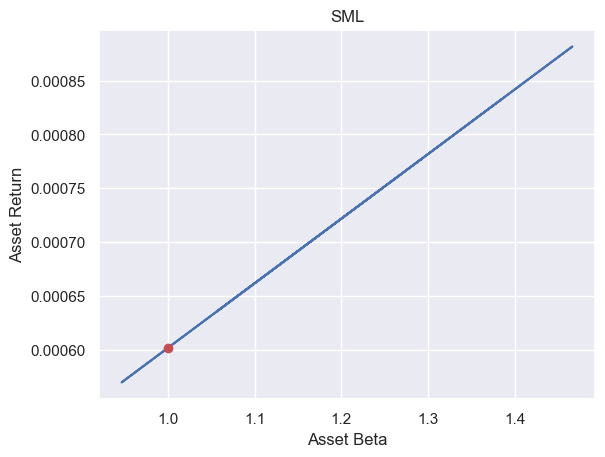

In [57]:
betas = [capm_aal_result.params[0],capm_luv_result.params[0],capm_ual_result.params[0],capm_ryaay_result.params[0],capm_jblu_result.params[0]]
rf = 0
rm = stock_returns['GSPC'].mean()
SML(rf, rm, betas)

The point's horizontal position corresponds to the asset's beta. A beta of 1 would mean the asset has the same systematic risk as the market. If it's greater than 1, it's considered more volatile than the market, and if it's less than 1, it's considered less volatile.
The point's vertical position indicates the expected return, which is what investors would require for the level of risk they're taking on by holding this asset.
Since the red point lies on the SML, this particular asset or portfolio is performing as expected for its level of risk based on the CAPM. Investors would be getting the "fair" return for the level of systematic risk associated with this asset.

In [58]:
stock_returns.describe()

Ticker          AAL         JBLU          LUV        RYAAY          UAL  \
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean       0.000040    -0.000247    -0.000076     0.000818     0.000134   
std        0.038583     0.035204     0.025038     0.025580     0.037316   
min       -0.252246    -0.195378    -0.151094    -0.200721    -0.302902   
25%       -0.018947    -0.016393    -0.012243    -0.012517    -0.015209   
50%       -0.001102    -0.001670    -0.000386     0.000964     0.000182   
75%        0.016959     0.014510     0.012442     0.013375     0.013876   
max        0.410970     0.370262     0.144441     0.187045     0.257143   

Ticker         GSPC  excess_return_AAL  excess_return_JBLU  excess_return_LUV  \
count   1257.000000        1257.000000         1257.000000        1257.000000   
mean       0.000602           0.000040           -0.000247          -0.000076   
std        0.013432           0.038583            0.035204           0.025038   
min       -0.119841          -0.252246           -0.195378          -0.151094   
25%       -0.005052          -0.018947           -0.016393          -0.012243   
50%        0.000903          -0.001102           -0.001670          -0.000386   
75%        0.007181           0.016959            0.014510           0.012442   
max        0.093828           0.410970            0.370262           0.144441   

Ticker  excess_return_RYAAY  excess_return_UAL  excess_return_GSPC  
count           1257.000000        1257.000000         1257.000000  
mean               0.000818           0.000134            0.000602  
std                0.025580           0.037316            0.013432  
min               -0.200721          -0.302902           -0.119841  
25%               -0.012517          -0.015209           -0.005052  
50%                0.000964           0.000182            0.000903  
75%                0.013375           0.013876            0.007181  
max                0.187045           0.257143            0.093828

In [59]:
df_all = pd.DataFrame()
df_all['betas'] = betas

# Sharpe and Treynor Ratios

In [60]:
stock_returns.columns[:5].tolist()

['AAL', 'JBLU', 'LUV', 'RYAAY', 'UAL']

In [61]:
stocks = stock_returns.columns[:5].tolist()
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i,j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = np.round((stock_returns.iloc[:,j].mean()-rf)/np.std(stock_returns.iloc[:,j]),4)
        
    return sharpe_ratios

In [63]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i,j in zip(stocks, range(n_assets)):
        treynor_ratios[i] = np.round((stock_returns.iloc[:,j].mean()-rf)/(df_all['betas'].iloc[j]),4)
        
    return treynor_ratios

In [64]:
treynor(stocks, rf, n_assets)

{'AAL': 0.0, 'JBLU': -0.0002, 'LUV': -0.0001, 'RYAAY': 0.0009, 'UAL': 0.0001}

American Airlines (AAL):

Sharpe Ratio: 0.001
Treynor Ratio: 0.0

The Sharpe ratio indicates a positive risk-adjusted return for American Airlines, albeit very low. However, the Treynor ratio suggests a risk-adjusted return close to the risk-free rate or even slightly below, indicating that the excess return of AAL may not compensate for the systematic risk undertaken.

JetBlue Airways (JBLU):

Sharpe Ratio: -0.007
Treynor Ratio: -0.0002

Both the Sharpe and Treynor ratios are negative for JetBlue Airways, indicating poor risk-adjusted performance compared to the risk-free rate and market index. Investors may perceive JBLU as delivering lower returns relative to the risk taken.

Southwest Airlines (LUV):

Sharpe Ratio: -0.003
Treynor Ratio: -0.0001

Similar to JBLU, Southwest Airlines also exhibits negative Sharpe and Treynor ratios, suggesting suboptimal risk-adjusted returns compared to the market index and risk-free rate.

Ryanair Holdings (RYAAY):

Sharpe Ratio: 0.032
Treynor Ratio: 0.0009

Ryanair Holdings demonstrates a positive Sharpe and Treynor ratio, indicating favorable risk-adjusted returns compared to both the market index and the risk-free rate. RYAAY appears to offer higher returns relative to its systematic risk.

United Airlines (UAL):

Sharpe Ratio: 0.0036
Treynor Ratio: 0.0001

UAL shows positive Sharpe and Treynor ratios, suggesting relatively good risk-adjusted returns compared to the market index and the risk-free rate. Investors may view UAL as providing satisfactory compensation for systematic risk.

In summary, while Ryanair Holdings and United Airlines demonstrate positive risk-adjusted returns, American Airlines, JetBlue Airways, and Southwest Airlines exhibit suboptimal performance in terms of risk-adjusted metrics. Investors should carefully consider these ratios along with other factors when making investment decisions.

# Modern Portfoilo Theory

In [65]:
returns = np.log(airline_stock_prices/airline_stock_prices.shift(1))

In [66]:
returns.dropna(inplace=True)

In [67]:
returns.describe()

Ticker          AAL         JBLU          LUV        RYAAY          UAL  \
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean      -0.000684    -0.000852    -0.000390     0.000492    -0.000567   
std        0.037911     0.034652     0.025082     0.025561     0.037620   
min       -0.290682    -0.217383    -0.163807    -0.224045    -0.360829   
25%       -0.019129    -0.016529    -0.012319    -0.012596    -0.015326   
50%       -0.001102    -0.001672    -0.000386     0.000963     0.000182   
75%        0.016817     0.014406     0.012366     0.013286     0.013780   
max        0.344278     0.315002     0.134917     0.171467     0.228842   

Ticker         GSPC  
count   1257.000000  
mean       0.000511  
std        0.013490  
min       -0.127652  
25%       -0.005064  
50%        0.000903  
75%        0.007155  
max        0.089683

In order to measure the portfolio performance,Sharpe and Treynor ratios are calculated.

In [68]:
def portfolio_frontier(iterations, returns): 
    portfolio_exp_means = []
    portfolio_std = []
    all_weights = []
    
    for i in range(iterations):
        # Generate random weights
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        all_weights.append(weights)
        
        # Calculate portfolio expected return
        portfolio_exp_means.append(np.sum(returns.mean() * weights))
        
        # Calculate portfolio standard deviation (volatility)
        portfolio_std.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights))))
    
    return portfolio_exp_means, portfolio_std, all_weights


In [69]:
# Define the number of iterations
iterations = 1000

# Call the function to generate the portfolio frontier
portfolio_exp_means, portfolio_std, all_weights = portfolio_frontier(iterations, returns)

In [70]:
portfolio_returns = np.array(portfolio_exp_means)
portfolio_risk = np.array(portfolio_std)

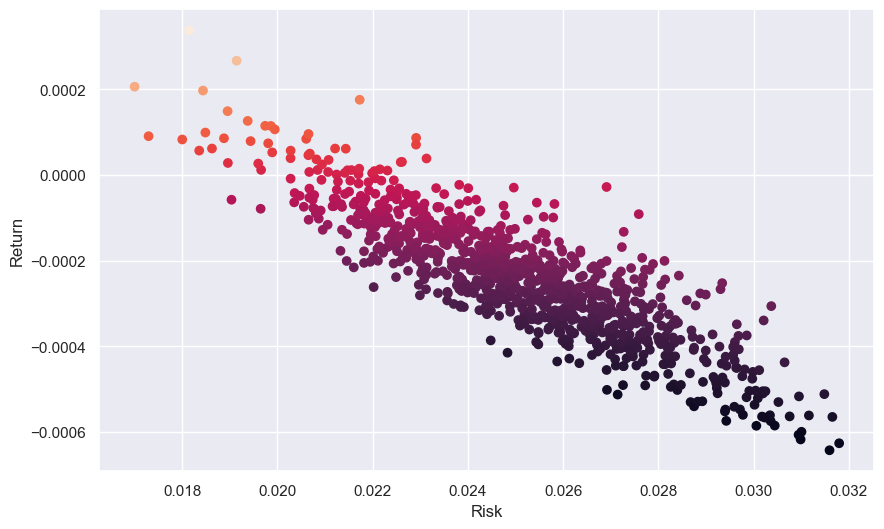

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolio_returns/portfolio_risk, marker='o') 
plt.xlabel('Risk') 
plt.ylabel('Return') 
plt.show()

In [72]:
sharpe = portfolio_returns/portfolio_risk

In [73]:
sharpe.max()

0.018615244439169336

In [74]:
df_vol = pd.DataFrame(portfolio_risk)
df_means = pd.DataFrame(portfolio_returns)
df_sharpe = pd.DataFrame(sharpe)

In [75]:
portfolio = pd.concat([df_vol, df_means, df_sharpe], axis=1)
portfolio.columns =  ['Volatility', 'Returns', 'Sharpe']

In [76]:
max_sharpe = portfolio.iloc[portfolio['Sharpe'].idxmax()]
min_sharpe = portfolio.iloc[portfolio['Sharpe'].idxmin()]

In [77]:
max_sharpe

Volatility    0.018147
Returns       0.000338
Sharpe        0.018615
Name: 419, dtype: float64

In [78]:
min_sharpe

Volatility    0.031591
Returns      -0.000643
Sharpe       -0.020341
Name: 767, dtype: float64

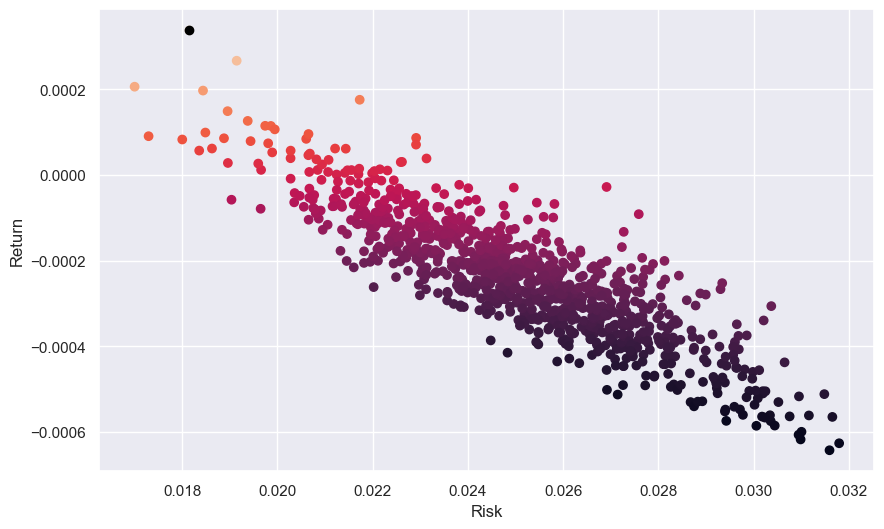

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risk, portfolio_returns, c=sharpe, marker='o') 
plt.scatter(max_sharpe[0],max_sharpe[1], c='black')
plt.xlabel('Risk') 
plt.ylabel('Return') 
plt.show()

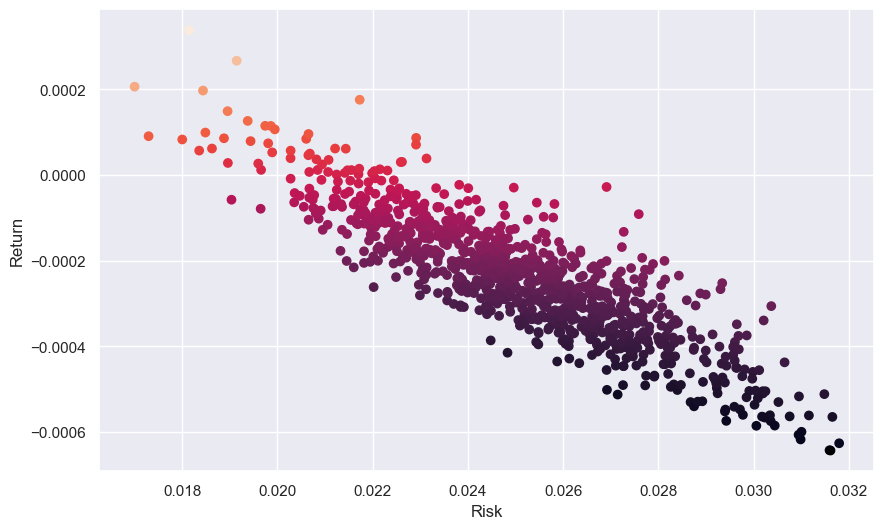

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risk, portfolio_returns, c=sharpe, marker='o') 
plt.scatter(min_sharpe[0],min_sharpe[1], c='black')
plt.xlabel('Risk') 
plt.ylabel('Return') 
plt.show()

# Portfolio Optimization via Optimization Algorithm

In [81]:
returns.mean()*252# annualized return

Ticker
AAL     -0.172473
JBLU    -0.214754
LUV     -0.098228
RYAAY    0.123878
UAL     -0.142953
GSPC     0.128710
dtype: float64

In [82]:
returns.cov()*np.sqrt(252)

Ticker       AAL      JBLU       LUV     RYAAY       UAL      GSPC
Ticker                                                            
AAL     0.022815  0.016490  0.011181  0.008001  0.019452  0.003979
JBLU    0.016490  0.019061  0.010194  0.008222  0.016308  0.003689
LUV     0.011181  0.010194  0.009986  0.005600  0.011616  0.003057
RYAAY   0.008001  0.008222  0.005600  0.010372  0.009275  0.002767
UAL     0.019452  0.016308  0.011616  0.009275  0.022467  0.004308
GSPC    0.003979  0.003689  0.003057  0.002767  0.004308  0.002889

In [83]:
def get_portfolio_metrics(weights, returns):
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * np.sqrt(252), weights)))
    sharpe_ratio = ret / vol
    return np.array([ret, vol, sharpe_ratio])

In [84]:
#Define the negative Sharpe ratio function for minimization
def negative_sharpe_ratio(weights, returns):
    return -get_portfolio_metrics(weights, returns)[2]

In [85]:
# Define the constraint function to ensure sum of weights equals 1
def constraint_sum(weights):
    return np.sum(weights) - 1

In [86]:
# Define initial guess and bounds for optimization
initial_guess = np.random.random(len(returns.columns))
 # Even distribution
bounds = [(0, 1)] * len(returns.columns)  # Bounds for weights between 0 and 1

In [87]:
#Define constraints
constraints = ({'type': 'eq', 'fun': constraint_sum})

In [88]:
from scipy.optimize import minimize

In [89]:
#Perform optimization using minimize function
opt_results = minimize(negative_sharpe_ratio, initial_guess, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)

In [90]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.394784205631611
       x: [ 1.378e-14  1.248e-14  1.237e-14  1.773e-03  7.279e-15
            9.982e-01]
     nit: 4
     jac: [ 6.514e+00  7.061e+00  4.366e+00 -6.258e-07  6.239e+00
           -2.980e-08]
    nfev: 29
    njev: 4

In [91]:
#Extract optimized weights from the result
optimized_weights = opt_results.x

In [92]:
# Calculate optimized portfolio metrics
optimized_metrics = get_portfolio_metrics(optimized_weights, returns)

In [93]:
print(f"Optimized Portfolio Metrics:\nReturn: {optimized_metrics[0]}, Volatility: {optimized_metrics[1]}, Sharpe Ratio: {optimized_metrics[2]}")

Optimized Portfolio Metrics:
Return: 0.12870107945519302, Volatility: 0.05374224498079518, Sharpe Ratio: 2.394784205631611


# TIME SERIES ANALYSIS

In [92]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [93]:
# List of airline stock tickers
airlines = ['LUV', 'UAL', 'AAL', 'RYAAY', 'JBLU']

# Define the start and end dates for your analysis
start_date = '2019-01-01'
end_date = '2024-01-01'

# Download stock price data for the given airlines
airline_stock_prices = yf.download(airlines, start=start_date, end=end_date, interval='1d')['Close']

[*********************100%%**********************]  5 of 5 completed


In [94]:
airline_stock_prices_filled = airline_stock_prices.fillna(method='ffill').fillna(method='bfill')

In [95]:
# Ensure the index is a datetime index
airline_stock_prices_filled.index = pd.to_datetime(airline_stock_prices_filled.index)

# Create a new index that includes all business days within the range
new_index = pd.date_range(start=airline_stock_prices_filled.index.min(), 
                          end=airline_stock_prices_filled.index.max(), 
                          freq='B')

# Reindex and forward fill any missing values, this time considering business days only
airline_stock_prices_filled = airline_stock_prices_filled.reindex(new_index).fillna(method='ffill')

In [96]:
print(airline_stock_prices_filled.index.freq)

<BusinessDay>


In [97]:
print(airline_stock_prices_filled.index)

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=1303, freq='B')


In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

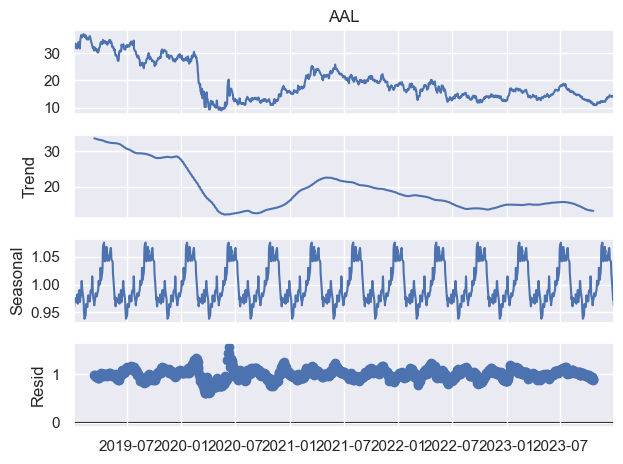

<Figure size 1000x200 with 0 Axes>

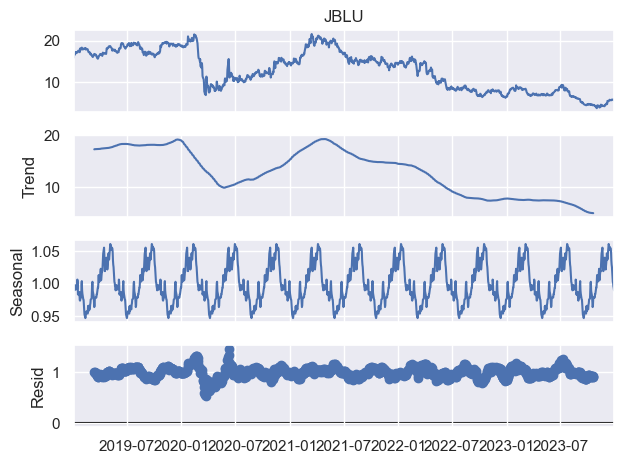

<Figure size 1000x200 with 0 Axes>

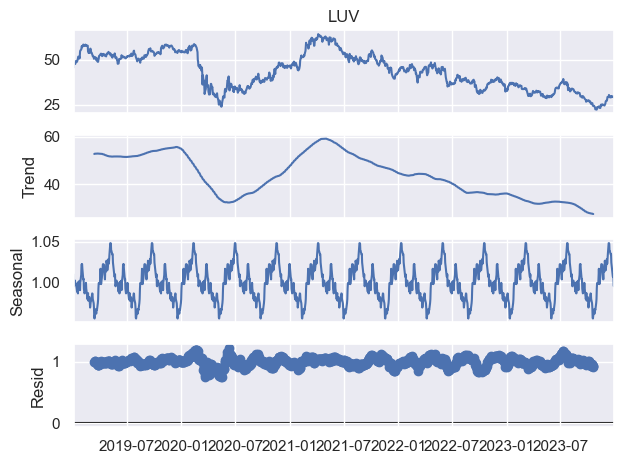

<Figure size 1000x200 with 0 Axes>

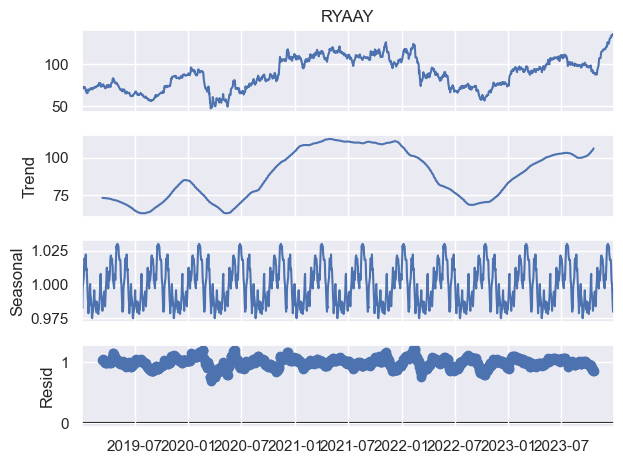

<Figure size 1000x200 with 0 Axes>

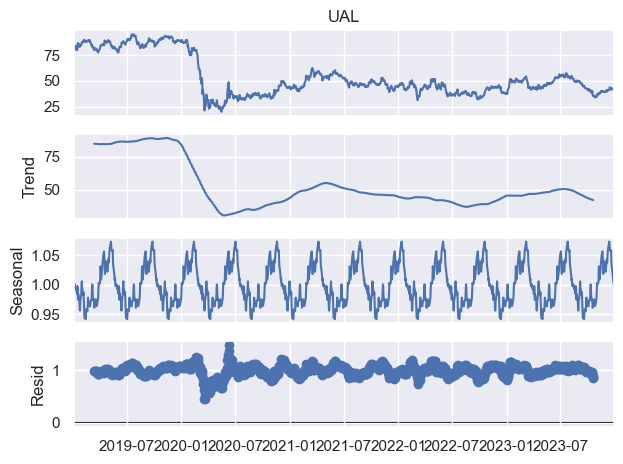

<Figure size 1000x200 with 0 Axes>

In [99]:
for column in airline_stock_prices_filled:
    decomposition = seasonal_decompose(airline_stock_prices_filled[column], model='multiplicative', period=100)
    decomposition.plot()
    plt.figure(figsize=(10, 2))
    plt.show()

The breakdown of airline stock prices into trend, seasonal, and residual components reveals various patterns in time series data. The seasonality found across all airlines, as evidenced by regular patterns in the seasonal component, suggests the presence of cyclical impacts, which might be related to variables such as travel seasons or fiscal quarters. Concurrently, the trend component for each airline shows a declining slope or noteworthy volatility, which might represent larger market conditions, economic variables, or industry-specific events throughout the investigated time. Importantly, the residuals—essentially the noise remaining after accounting for trend and seasonality—show no discernible patterns, demonstrating the multiplicative model's efficacy in capturing the major systematic components of stock prices. 

#### ADF TEST

In [100]:
from statsmodels.tsa.stattools import adfuller
for column in airline_stock_prices_filled:
    stat_test = adfuller(airline_stock_prices_filled[column])
    print('The statistic for {} is {} and p-value is {}'.format(column,stat_test[0],stat_test[1]))

The statistic for AAL is -2.1393805365344427 and p-value is 0.22897703706670075
The statistic for JBLU is -1.4721352658370546 and p-value is 0.5472478506906712
The statistic for LUV is -1.8364144207056716 and p-value is 0.36253860502649016
The statistic for RYAAY is -1.5475310545892116 and p-value is 0.5098812303918646
The statistic for UAL is -1.8219159208663678 and p-value is 0.3696366039304001


For each of the stocks—AAL, JBLU, LUV, RYAAY, and UAL—the ADF test provided a test statistic and a corresponding p-value. The test statistic helps us determine how strongly the series is defined as non-stationary. Typically, more negative values suggest a trend-stationary series, while values closer to zero suggest non-stationarity.

The p-values tell us the probability of obtaining the observed test statistics if the null hypothesis is true. In this context, the null hypothesis states that the series is non-stationary. Common practice suggests that a p-value below 0.05 indicates strong evidence against the null hypothesis, leading us to reject it and conclude that the series is stationary.

However, the results of the ADF test for our series are as follows:

AAL: Test statistic of -2.14, p-value of 0.23
JBLU: Test statistic of -1.47, p-value of 0.55
LUV: Test statistic of -1.84, p-value of 0.36
RYAAY: Test statistic of -1.55, p-value of 0.51
UAL: Test statistic of -1.82, p-value of 0.37
Given that all p-values are significantly above 0.05, we fail to reject the null hypothesis for each of the airline stocks. This indicates that there is not enough evidence to consider the time series data as stationary. This non-stationarity could be due to trends, cycles, or other structural changes in the data over time.

## ACF

In [101]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

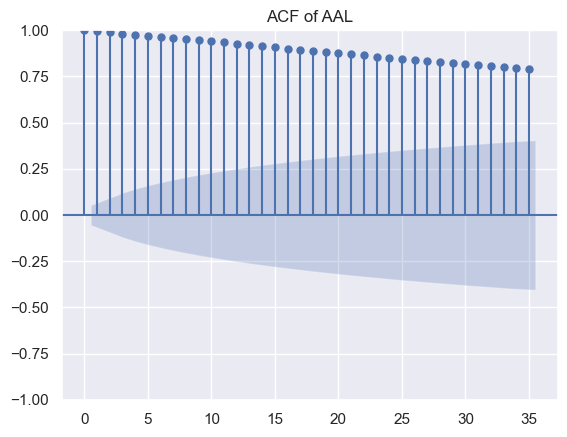

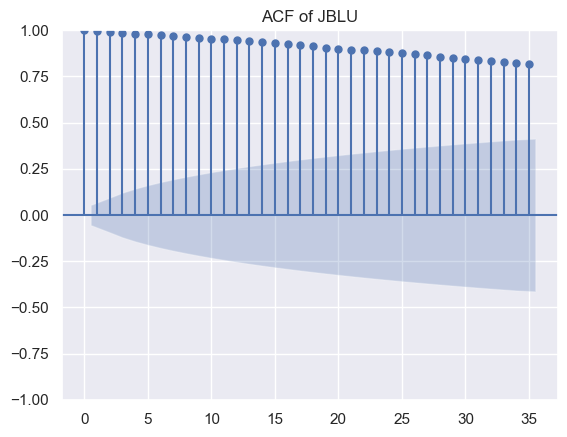

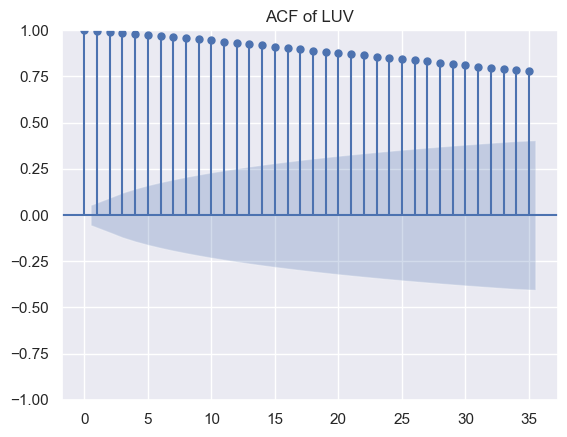

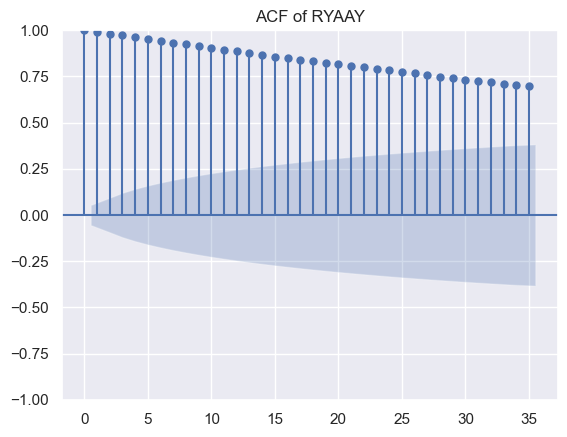

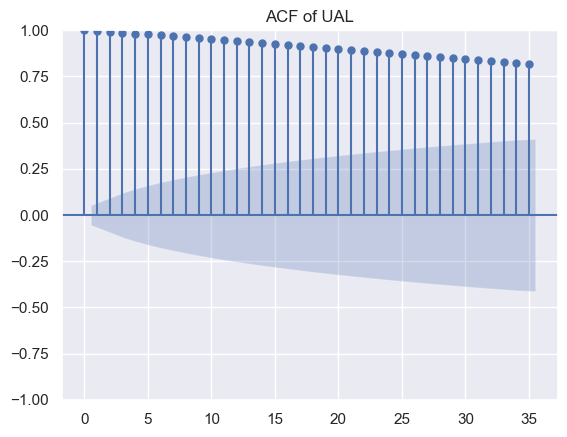

In [103]:
for col in airline_stock_prices_filled:
    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_acf(airline_stock_prices_filled[col], lags=35, ax=ax)
    ax.set_title('ACF of ' + col)
    plt.show()


The ACF plots for the airline stocks AAL, JBLU, LUV, RYAAY, and UAL display a strong persistence in autocorrelation across various lags, indicating non-stationary behavior where past values significantly influence future values. The slow decay of autocorrelation, remaining well above the statistical significance threshold for many lags, suggests a need for differencing to achieve stationarity. There's no evidence of sudden drops that might imply seasonal effects or distinct autoregressive orders. These characteristics point toward the potential application of models designed for non-stationary data, such as ARIMA, for effective forecasting after appropriate transformations are applied to stabilize the time series.

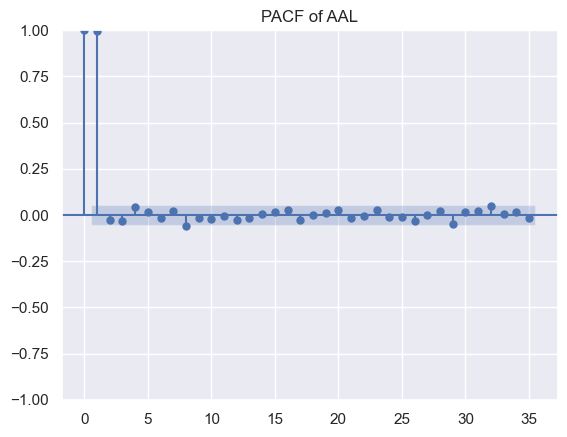

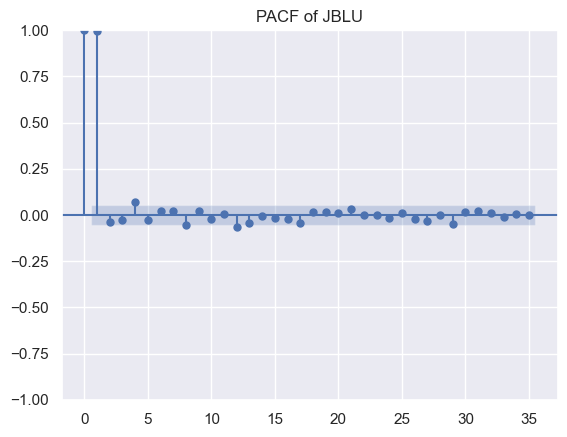

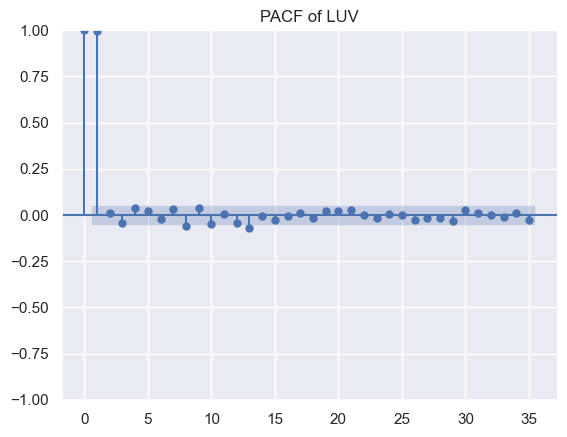

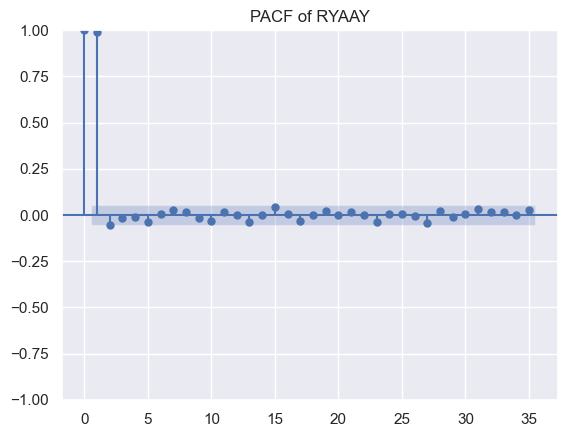

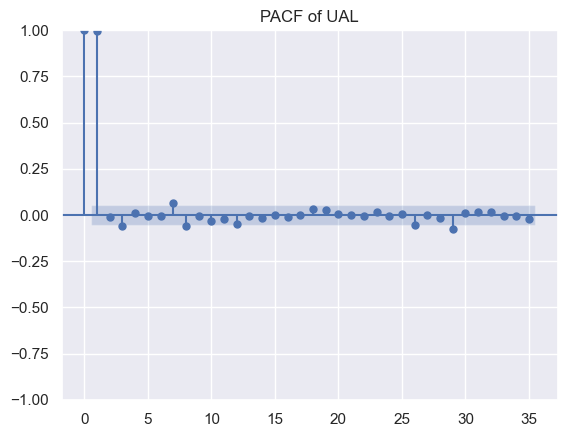

In [104]:
for col in airline_stock_prices_filled:
    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_pacf(airline_stock_prices_filled[col], lags=35, ax=ax)
    ax.set_title('PACF of ' + col)
    plt.show()



The Partial Autocorrelation Function (PACF) plots for the airline stocks AAL, JBLU, LUV, RYAAY, and UAL reveal a strong partial correlation at lag 1, with subsequent lags showing negligible correlation. This pattern, where the PACF cuts off after the first lag, typically suggests that an AR(1) model may be appropriate for these time series. The lack of significant correlations at higher lags indicates that the current value of the stock is primarily influenced by its immediate past value, without the need to account for further lagged terms in the autoregressive modeling of these data

#### Converting the data to stationarity

In [105]:
# Computing the difference between airline stock prices
airline_stock_prices_diff = airline_stock_prices_filled.diff().dropna()

# Checking if the differences are stationary
for col in airline_stock_prices_diff.columns:
    adf_test = sm.tsa.adfuller(airline_stock_prices_diff[col])
    print(f'ADF Test for {col}:')
    print('ADF Statistic:', adf_test[0])
    print('p-value:', adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'   {key}: {value}')
    if adf_test[1] < 0.05:
        print(f'{col} is likely stationary\n')
    else:
        print(f'{col} is likely non-stationary\n')

ADF Test for AAL:
ADF Statistic: -12.86436152442007
p-value: 5.0318044087252505e-24
Critical Values:
   1%: -3.4354096984769003
   5%: -2.863774435037593
   10%: -2.567959628657891
AAL is likely stationary

ADF Test for JBLU:
ADF Statistic: -9.342624571060963
p-value: 8.714268882434082e-16
Critical Values:
   1%: -3.4354293489429533
   5%: -2.863783105605889
   10%: -2.567964246139054
JBLU is likely stationary

ADF Test for LUV:
ADF Statistic: -9.17735321682308
p-value: 2.3009466205453268e-15
Critical Values:
   1%: -3.4354293489429533
   5%: -2.863783105605889
   10%: -2.567964246139054
LUV is likely stationary

ADF Test for RYAAY:
ADF Statistic: -34.23427089952275
p-value: 0.0
Critical Values:
   1%: -3.4353863176881863
   5%: -2.863764118428576
   10%: -2.5679541345952175
RYAAY is likely stationary

ADF Test for UAL:
ADF Statistic: -12.951522770164013
p-value: 3.3684924609055924e-24
Critical Values:
   1%: -3.4354096984769003
   5%: -2.863774435037593
   10%: -2.567959628657891
UAL 

After differencing the airline stock prices to address non-stationarity, the Augmented Dickey-Fuller (ADF) test was applied to each of the transformed series. The results are highly indicative of stationarity for each stock: AAL, JBLU, LUV, RYAAY, and UAL. For all stocks, the ADF statistics are significantly negative, well below the critical values for 1%, 5%, and 10% levels, and the p-values are extremely small, effectively zero for some. This suggests with strong confidence that the differenced series are stationary. Stationarity is an important property for time series forecasting, as it implies that the statistical properties of the series will remain consistent over time, making the data suitable for building predictive models.

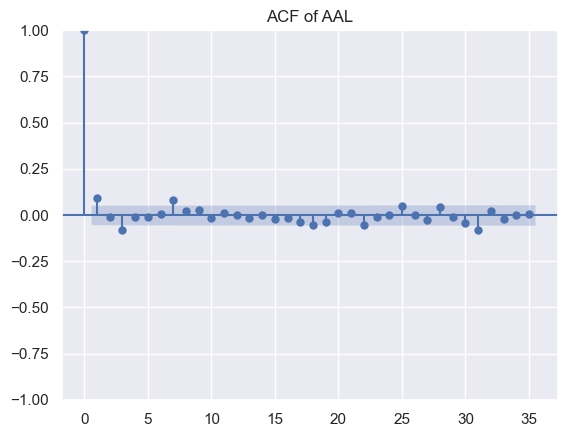

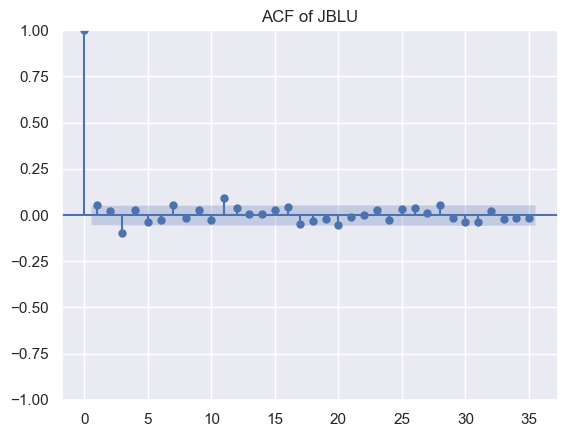

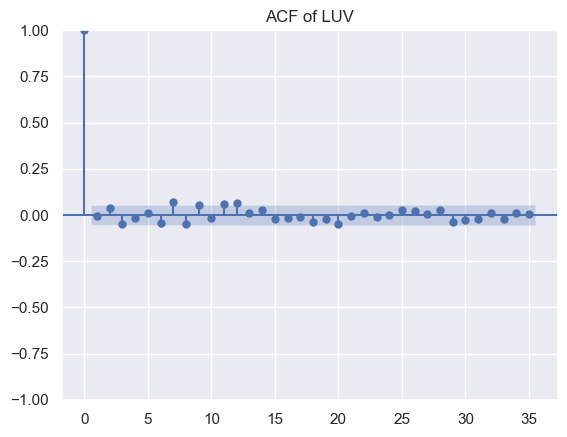

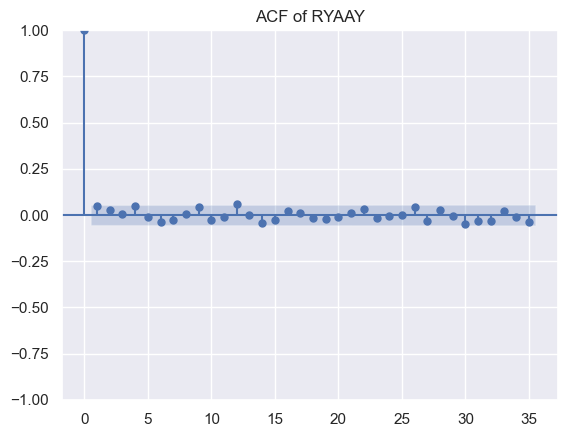

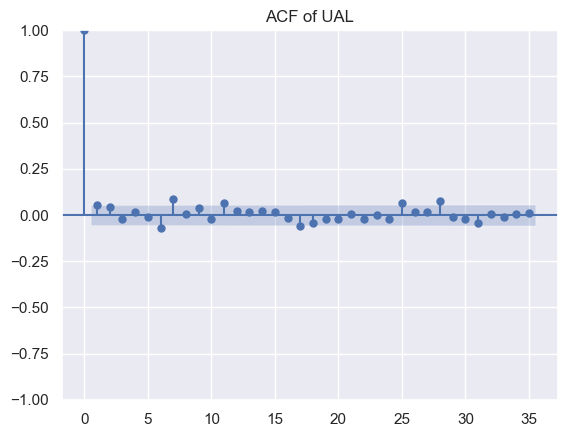

In [106]:
for column in airline_stock_prices_diff:
    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_acf(airline_stock_prices_diff[column], lags=35, ax=ax)
    ax.set_title('ACF of ' + column)
    plt.show()

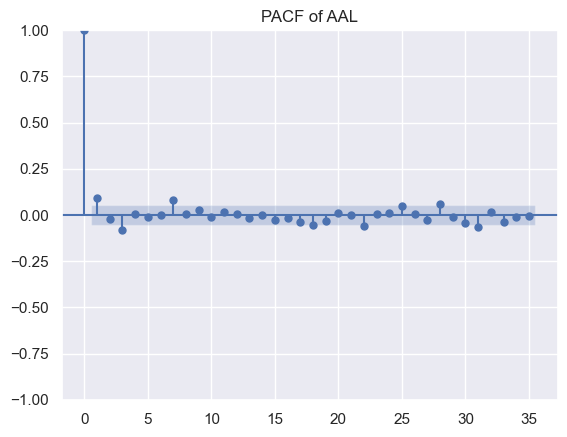

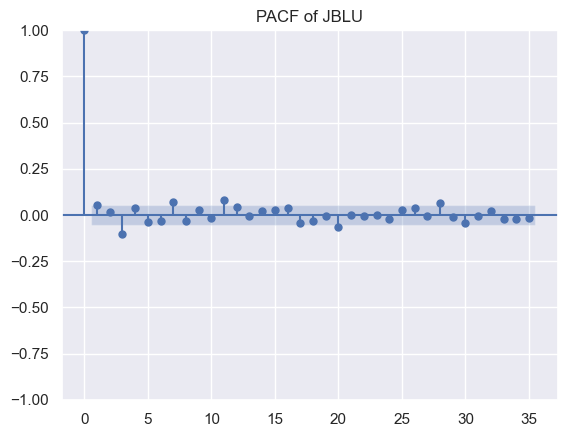

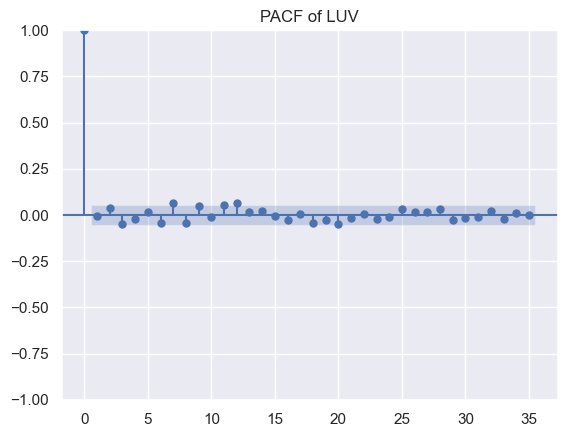

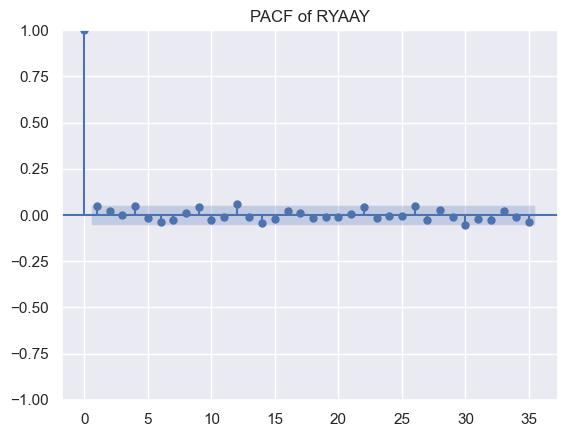

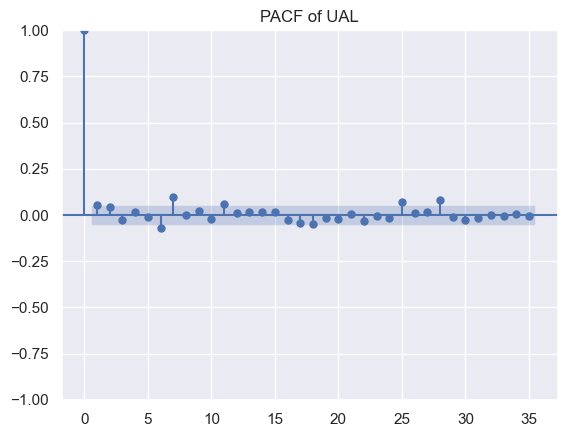

In [107]:
for column in airline_stock_prices_diff:
    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_pacf(airline_stock_prices_diff[column], lags=35, ax=ax)
    ax.set_title('PACF of ' + column)
    plt.show()

The PACF plots for the differenced airline stock prices—AAL, JBLU, LUV, RYAAY, and UAL—consistently show a significant spike at the first lag with no other significant correlations at higher lags. This pattern suggests that an AR(1) model is likely appropriate for these differenced series, indicating that each stock price is primarily influenced by its price from the previous time period. The rapid decline in the PACF values past the first lag corroborates the stationarity of the differenced series, supporting the previous findings from the ADF tests.

### Moving Average

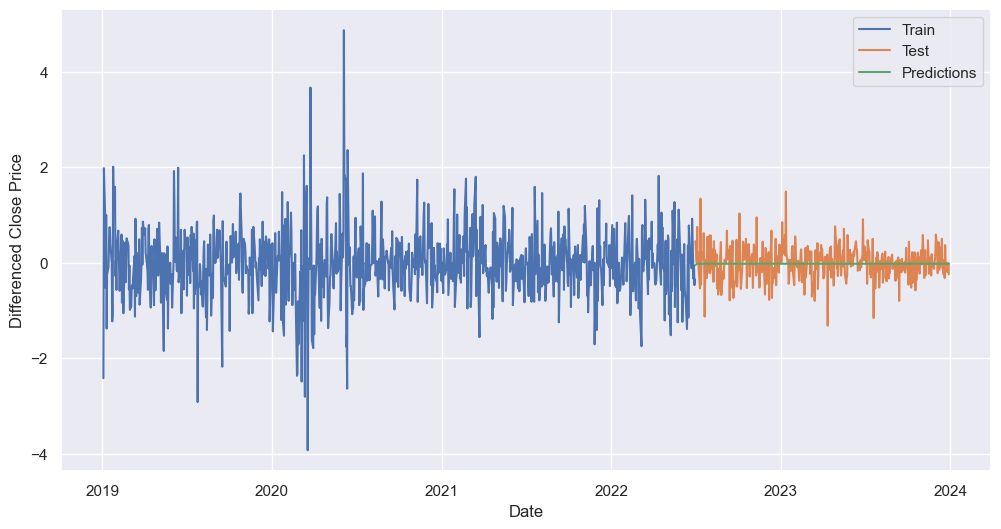

Performance metrics for AAL:
        MAE       MSE      RMSE
0  0.259151  0.120354  0.346921


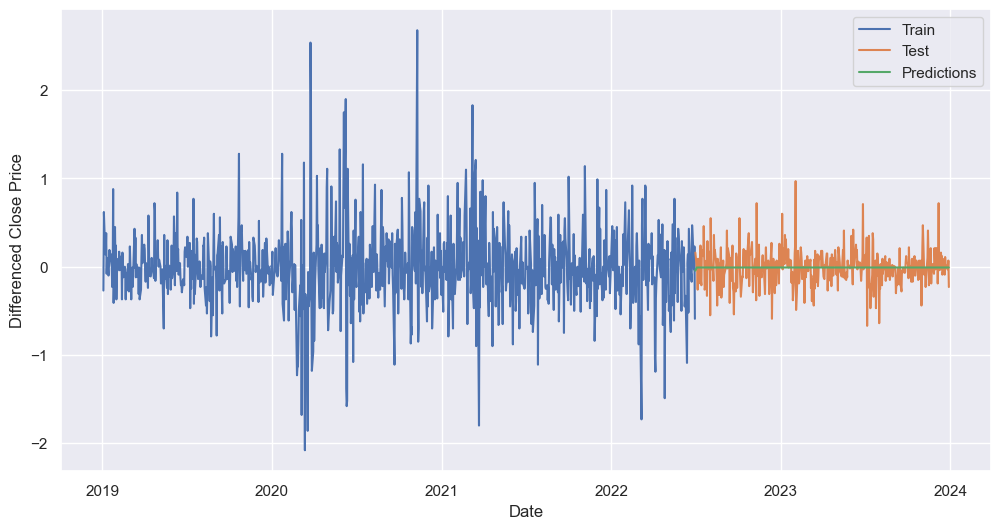

Performance metrics for JBLU:
       MAE       MSE      RMSE
0  0.15066  0.042781  0.206836


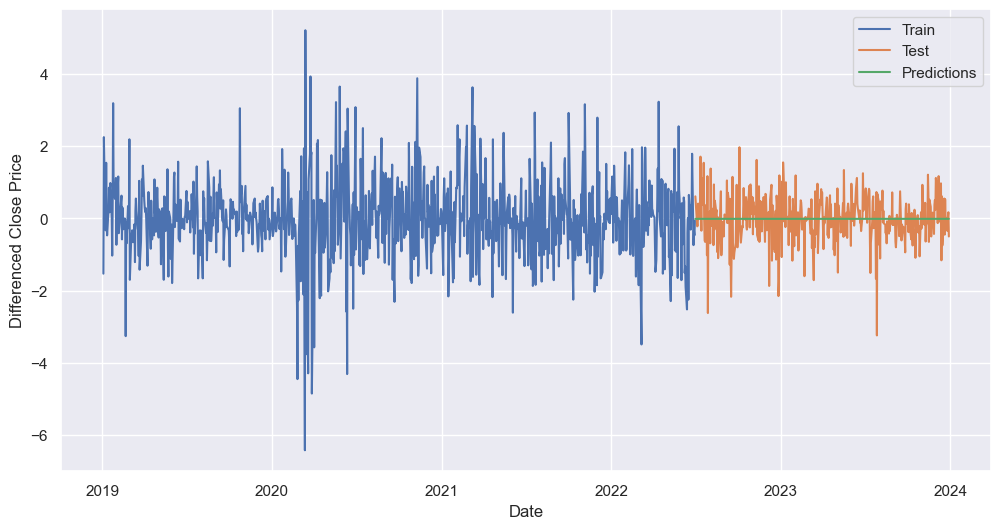

Performance metrics for LUV:
        MAE       MSE      RMSE
0  0.490267  0.439252  0.662761


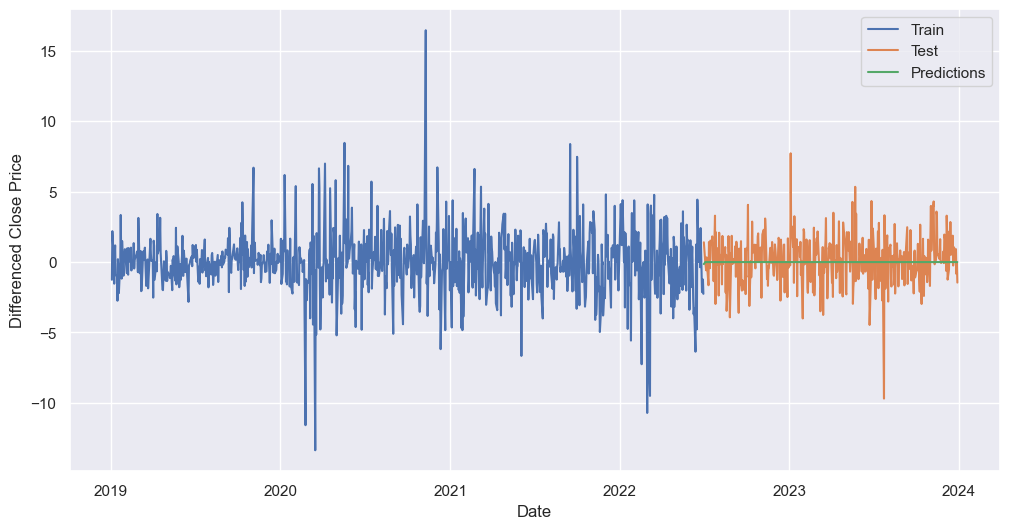

Performance metrics for RYAAY:
        MAE       MSE      RMSE
0  1.291394  2.993146  1.730071


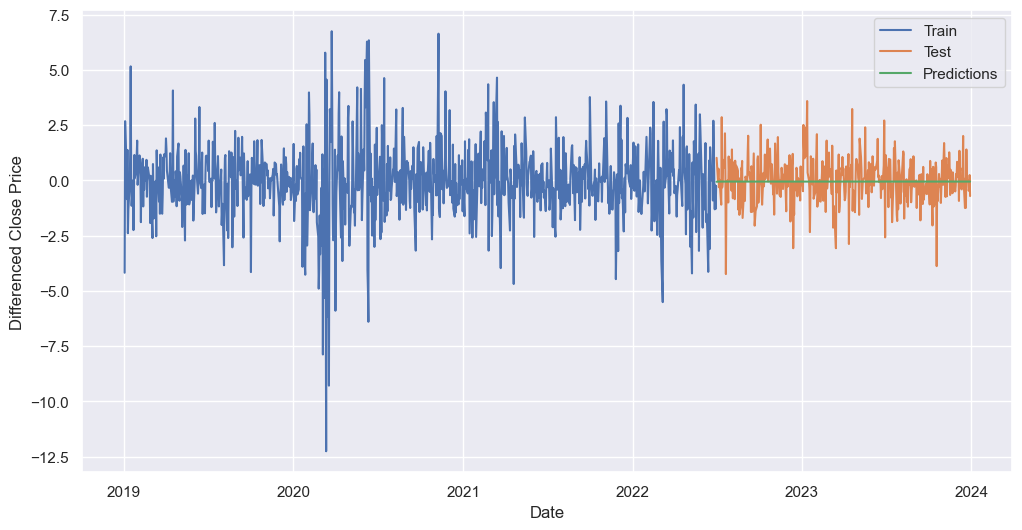

Performance metrics for UAL:
        MAE       MSE      RMSE
0  0.768779  1.063199  1.031115


In [108]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

for column in airline_stock_prices_diff:
    # Defining training and test sets
    train_len = int(len(airline_stock_prices_diff[column]) * 0.7)
    diff_train = airline_stock_prices_diff[column][:train_len]
    diff_test = airline_stock_prices_diff[column][train_len:]

    # Indices to start and end the prediction
    start = len(diff_train)
    end = len(diff_train) + len(diff_test) - 1

    # Fitting the ARIMA model with order (0,0,1)
    arima_model = ARIMA(diff_train, order=(0, 0, 1))
    arima_result = arima_model.fit()

    #predictions
    arima_pred = arima_result.predict(start, end)
    arima_pred.index = diff_test.index

    # actual vs predicted values plot
    plt.figure(figsize=(12, 6))
    plt.plot(diff_train.index, diff_train, label='Train')
    plt.plot(diff_test.index, diff_test, label='Test')
    plt.plot(arima_pred.index, arima_pred, label='Predictions')
    plt.xlabel('Date')
    plt.ylabel('Differenced Close Price')
    plt.legend()
    plt.show()

    # Calculating performance metrics
    mae = mean_absolute_error(diff_test, arima_pred)
    mse = mean_squared_error(diff_test, arima_pred)
    rmse = np.sqrt(mse)
    performance_metrics = pd.DataFrame({
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse]
    })
    print(f'Performance metrics for {column}:')
    print(performance_metrics)


The ARIMA model results for AAL stock show the training data, test data, and predictions visualized over time. The model’s predictions follow the general trend of the test data, which indicates that the model has captured the time series characteristics to some extent. Quantitatively, the model’s predictions have a Mean Absolute Error (MAE) of 0.259, a Mean Squared Error (MSE) of 0.120, and a Root Mean Squared Error (RMSE) of 0.347. These metrics suggest that the model's predictions are fairly close to the actual data points, with the RMSE providing a more conservative measure of prediction error. The ARIMA(0,0,1) configuration, emphasizing the moving average component, appears to be a reasonable approach to modeling the stock's price movements based on the differenced data.



The performance of the ARIMA(0,0,1) model on the JBLU stock's differenced closing prices is visualized in the plot, with the training and test datasets, and the predicted values. The Mean Absolute Error (MAE) is 0.15066, the Mean Squared Error (MSE) is 0.042781, and the Root Mean Squared Error (RMSE) is 0.206836. These error metrics indicate a reasonable level of accuracy in the model's predictions relative to the scale of the differencing, with lower error values reflecting a tighter fit to the test data.


The ARIMA(0,0,1) model applied to the LUV stock's differenced closing prices exhibits a Mean Absolute Error (MAE) of 0.490267, a Mean Squared Error (MSE) of 0.439252, and a Root Mean Squared Error (RMSE) of 0.662761. The plot suggests that while the model captures the general direction of the price movements, the errors are larger compared to the JBLU stock. This might indicate that the LUV stock price movements are more volatile or less predictable using this simple MA model, as reflected by the higher RMSE value. 

The ARIMA(0,0,1) model’s predictions for the RYAAY stock’s differenced closing prices have resulted in a Mean Absolute Error (MAE) of 1.291394, a Mean Squared Error (MSE) of 2.993146, and a Root Mean Squared Error (RMSE) of 1.730071. These performance metrics indicate a higher level of prediction error for RYAAY compared to the earlier examples of AAL and JBLU.


The ARIMA(0,0,1) model applied to UAL's differenced closing prices yielded a Mean Absolute Error (MAE) of 0.768779, a Mean Squared Error (MSE) of 1.063199, and a Root Mean Squared Error (RMSE) of 1.031115. The performance metrics indicate that the prediction error is moderate, with the model’s predictions not tracking the test data as closely as one might prefer. The plot illustrates the model's attempt to capture the movement of the differenced closing prices, but with significant volatility present, the model's predictive accuracy is understandably affected, as reflected by the RMSE value being over 1. This suggests that while the model is capable of following the general trend of the stock's price movements, there's a notable deviation between the predicted and actual values.



### Autoregressive

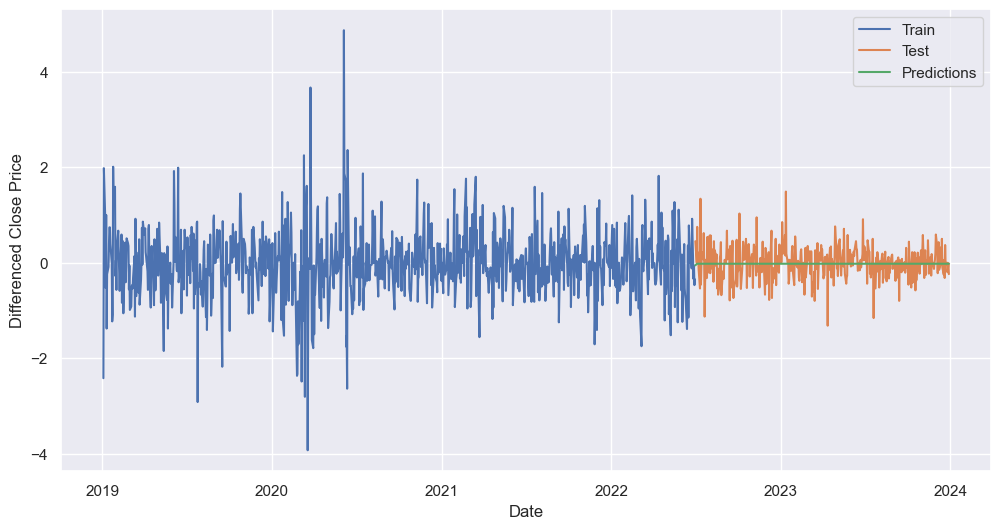

Performance metrics for AAL:
        MAE       MSE      RMSE
0  0.259172  0.120368  0.346941


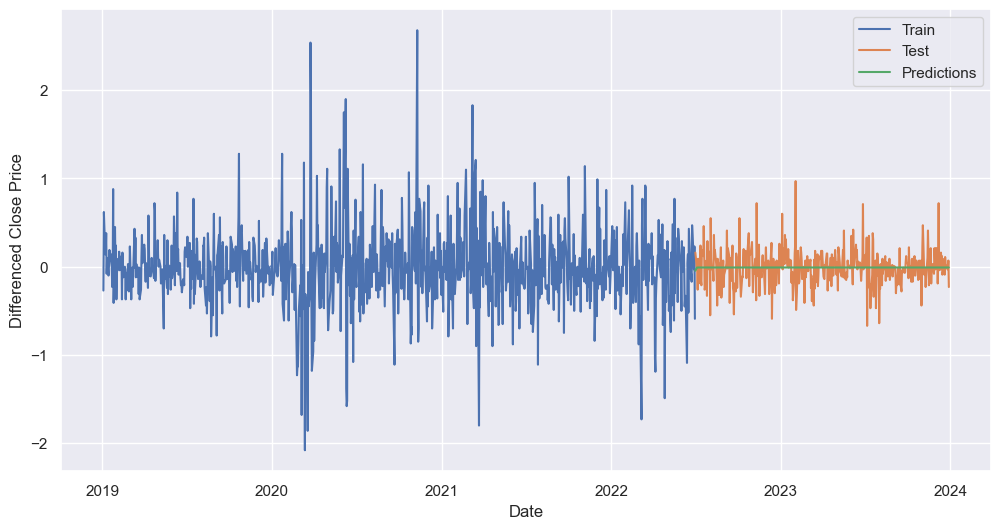

Performance metrics for JBLU:
        MAE       MSE      RMSE
0  0.150668  0.042782  0.206839


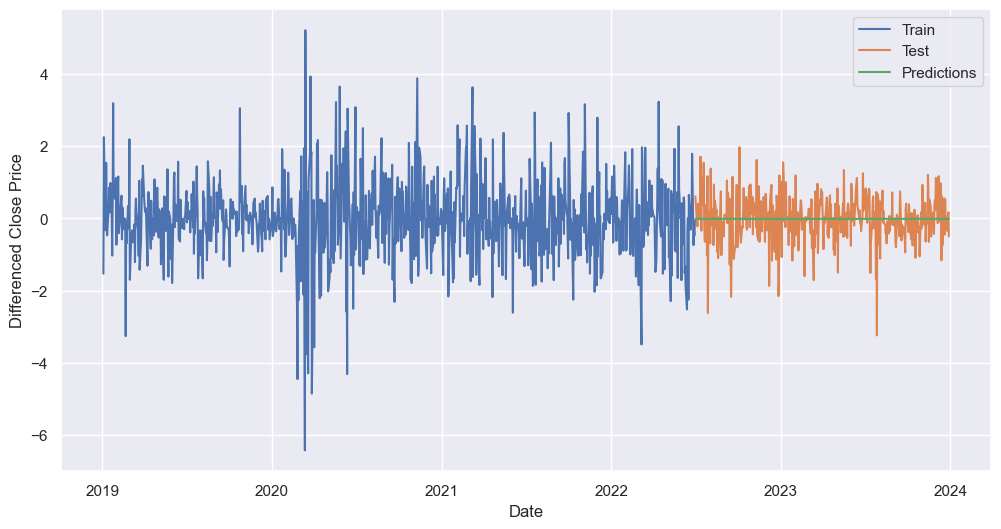

Performance metrics for LUV:
        MAE       MSE      RMSE
0  0.490267  0.439252  0.662761


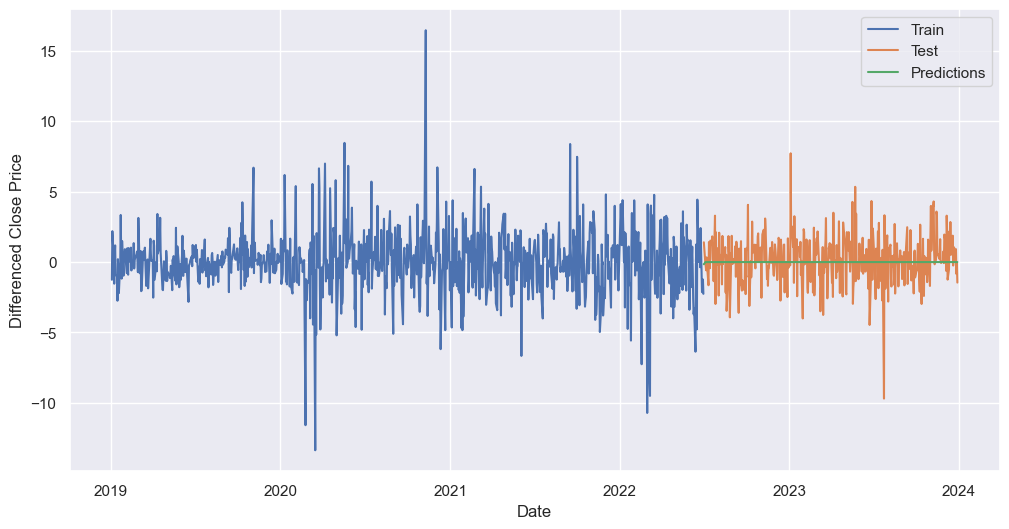

Performance metrics for RYAAY:
        MAE       MSE      RMSE
0  1.291444  2.993232  1.730096


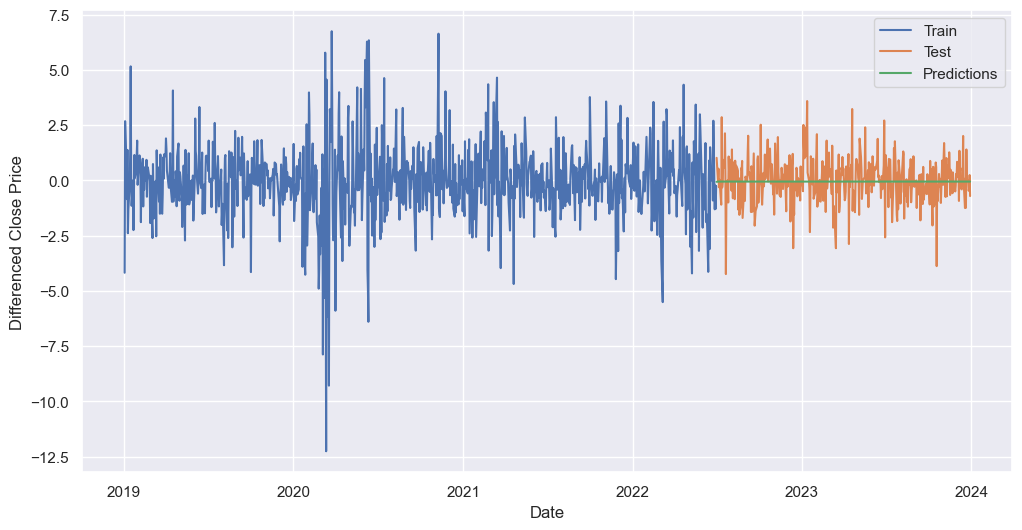

Performance metrics for UAL:
        MAE       MSE      RMSE
0  0.768792  1.063219  1.031125


In [109]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

for column in airline_stock_prices_diff:
    # Defining training and test sets
    train_len = int(len(airline_stock_prices_diff[column]) * 0.7)
    diff_train = airline_stock_prices_diff[column][:train_len]
    diff_test = airline_stock_prices_diff[column][train_len:]

    # Indices to start and end the prediction
    start = len(diff_train)
    end = len(diff_train) + len(diff_test) - 1

    # Fitting the ARIMA model with order (1,0,0)
    arima_model = ARIMA(diff_train, order=(1, 0, 0))
    arima_result = arima_model.fit()

    #predictions
    arima_pred = arima_result.predict(start, end)
    arima_pred.index = diff_test.index

    #actual vs predicted values plot
    plt.figure(figsize=(12, 6))
    plt.plot(diff_train.index, diff_train, label='Train')
    plt.plot(diff_test.index, diff_test, label='Test')
    plt.plot(arima_pred.index, arima_pred, label='Predictions')
    plt.xlabel('Date')
    plt.ylabel('Differenced Close Price')
    plt.legend()
    plt.show()

    # Calculating performance metrics
    mae = mean_absolute_error(diff_test, arima_pred)
    mse = mean_squared_error(diff_test, arima_pred)
    rmse = np.sqrt(mse)
    performance_metrics = pd.DataFrame({
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse]
    })
    print(f'Performance metrics for {column}:')
    print(performance_metrics)

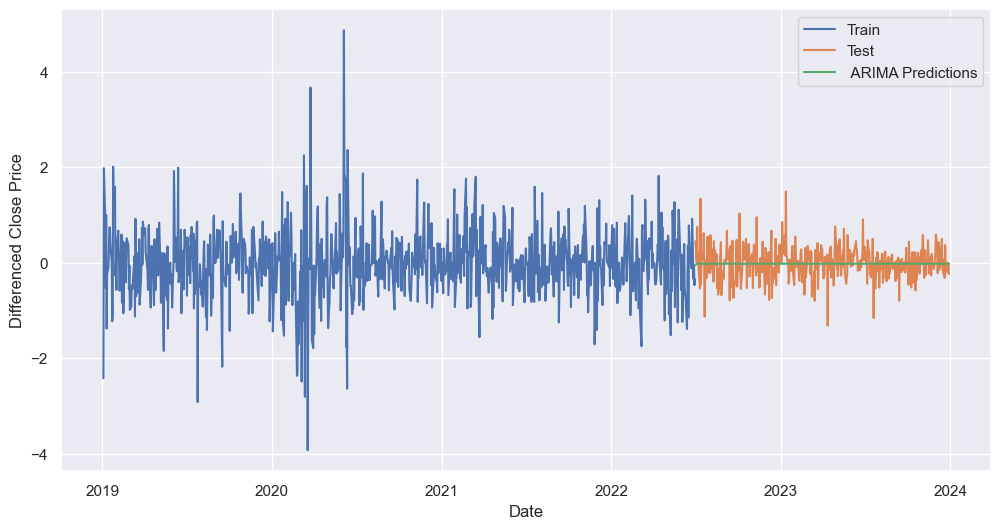

Performance metrics for AAL:
        MAE       MSE      RMSE
0  0.259153  0.120357  0.346925


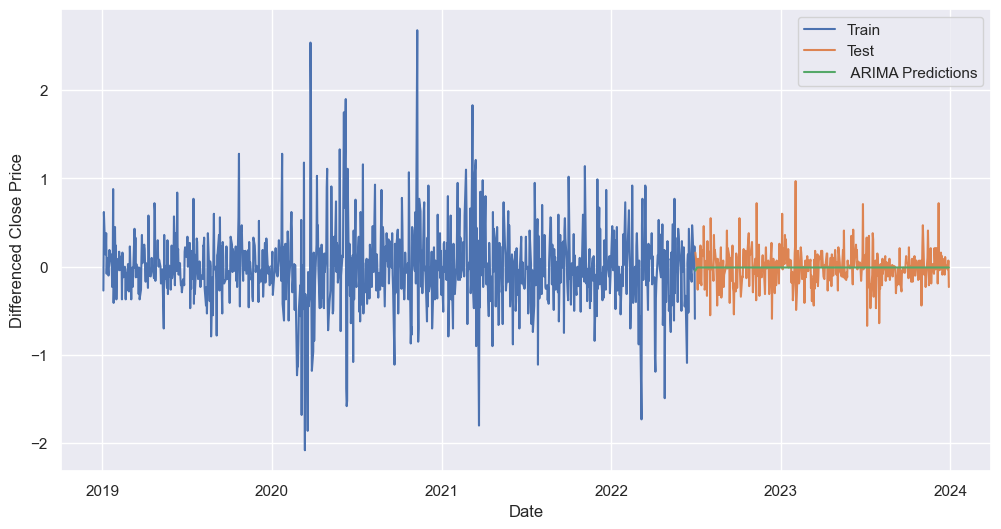

Performance metrics for JBLU:
        MAE       MSE      RMSE
0  0.150673  0.042782  0.206837


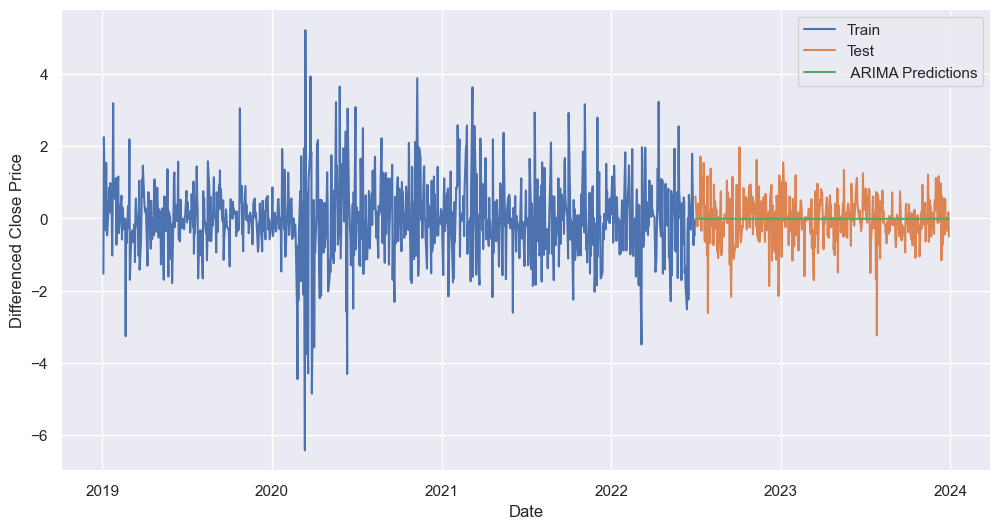

Performance metrics for LUV:
        MAE       MSE      RMSE
0  0.490267  0.439252  0.662761


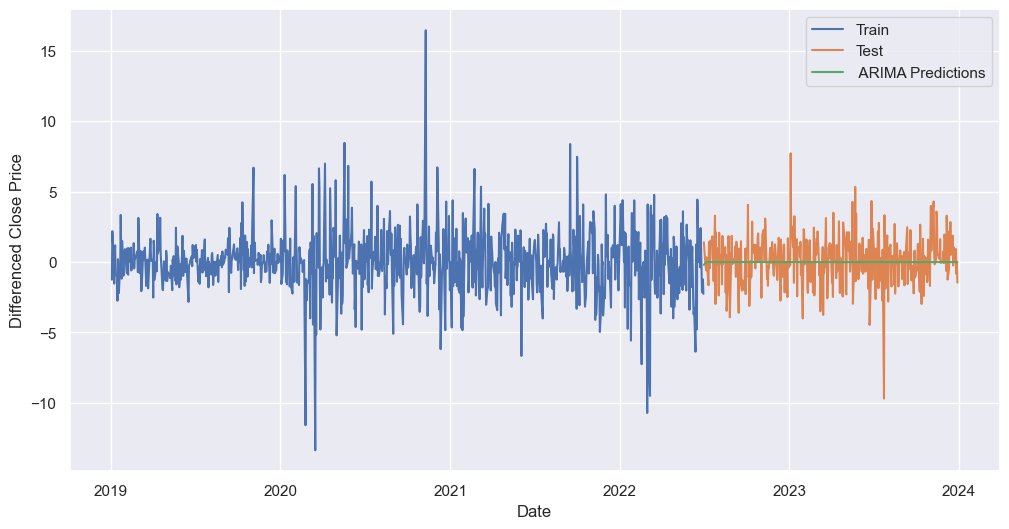

Performance metrics for RYAAY:
        MAE       MSE      RMSE
0  1.291677  2.993635  1.730212


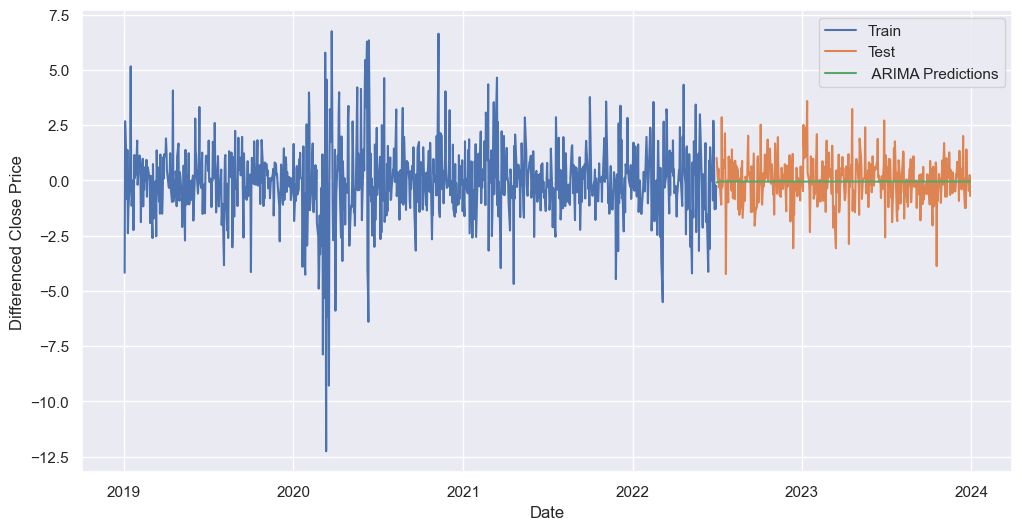

Performance metrics for UAL:
        MAE       MSE      RMSE
0  0.768934  1.063417  1.031221


In [110]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


for column in airline_stock_prices_diff:
    # Defining training and test sets
    train_len = int(len(airline_stock_prices_diff[column]) * 0.7)
    diff_train = airline_stock_prices_diff[column][:train_len]
    diff_test = airline_stock_prices_diff[column][train_len:]

    # Indices to start and end the prediction
    start = len(diff_train)
    end = len(diff_train) + len(diff_test) - 1

    # Fitting the ARIMA model with order (1,0,1)
    arima_model = ARIMA(diff_train, order=(1, 0, 1))
    arima_result = arima_model.fit()

    #Predictions
    arima_pred = arima_result.predict(start, end)
    arima_pred.index = diff_test.index

    #actual vs predicted values plot
    plt.figure(figsize=(12, 6))
    plt.plot(diff_train.index, diff_train, label='Train')
    plt.plot(diff_test.index, diff_test, label='Test')
    plt.plot(arima_pred.index, arima_pred, label=' ARIMA Predictions')
    plt.xlabel('Date')
    plt.ylabel('Differenced Close Price')
    plt.legend()
    plt.show()

    # Calculating performance metrics
    mae = mean_absolute_error(diff_test, arima_pred)
    mse = mean_squared_error(diff_test, arima_pred)
    rmse = np.sqrt(mse)
    performance_metrics = pd.DataFrame({
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse]
    })
    print(f'Performance metrics for {column}:')
    print(performance_metrics)

### Moving Average Forecasting

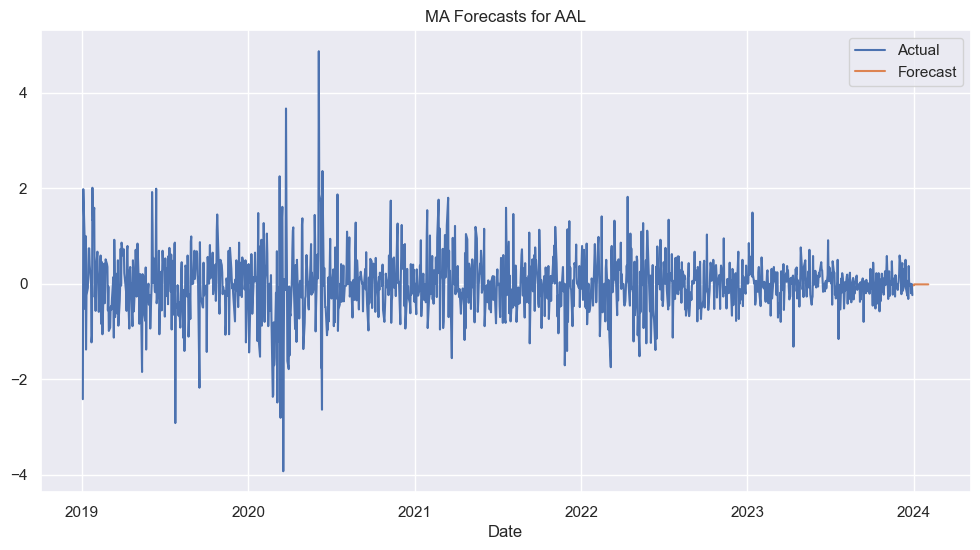

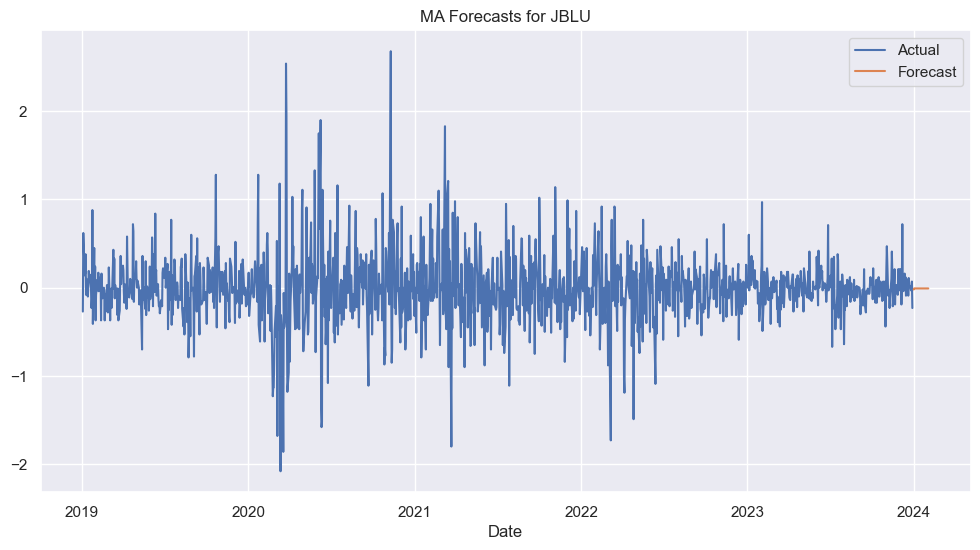

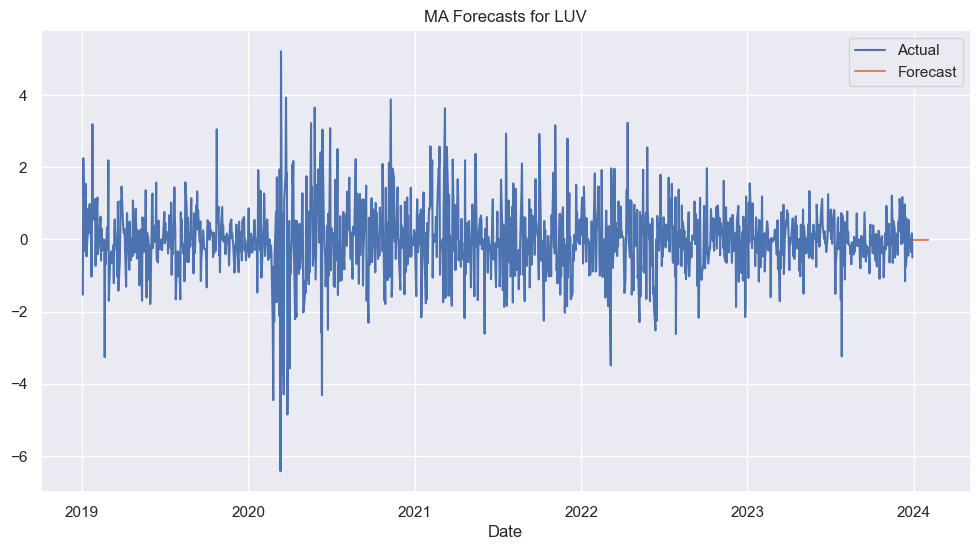

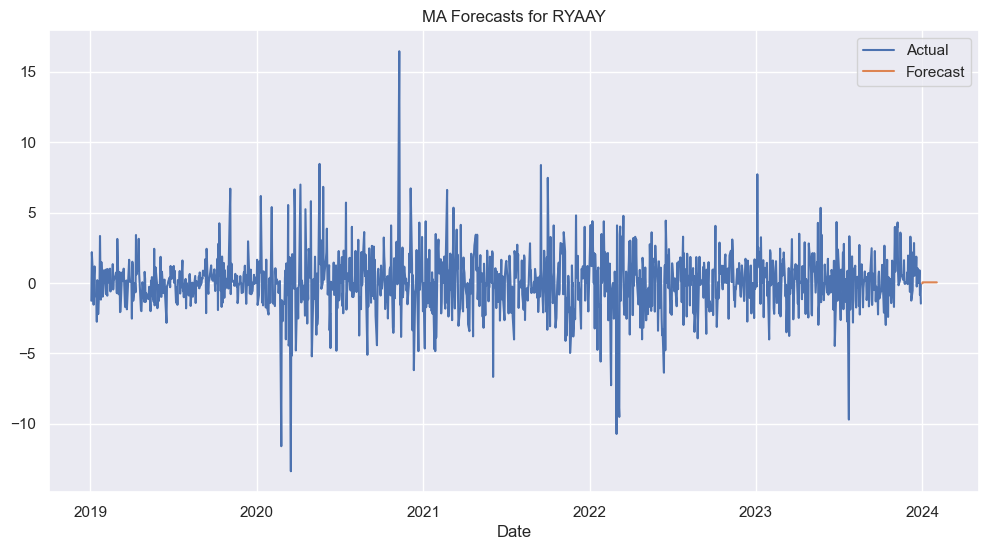

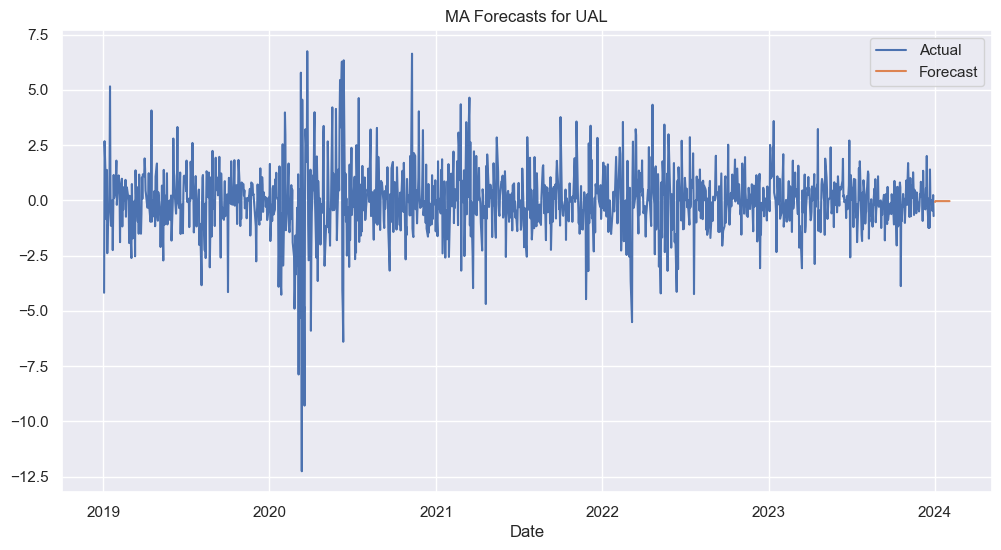

In [111]:
from statsmodels.tsa.arima.model import ARIMA

for column in airline_stock_prices_diff:
    # Fitting the MA model with order (0, 0, 1) - which is an MA(1) model
    ma_model = ARIMA(airline_stock_prices_diff[column], order=(0, 0, 1))
    ma_result = ma_model.fit()

    # Forecasting the next 25 periods
    forecast_index = pd.date_range(start=airline_stock_prices_diff[column].index[-1], periods=26, freq='B')[1:]  # 'B' denotes business day frequency
    ma_forecast = ma_result.get_forecast(steps=25)
    ma_forecast_predicted_mean = ma_forecast.predicted_mean
    ma_forecast_predicted_mean.index = forecast_index
    
    # Plotting the actual data and the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(airline_stock_prices_diff[column].index, airline_stock_prices_diff[column], label='Actual')
    plt.plot(ma_forecast_predicted_mean.index, ma_forecast_predicted_mean, label='Forecast')
    plt.legend()
    plt.title(f'MA Forecasts for {column}')
    plt.xlabel('Date')
    plt.show()

### Auto Regressive Forecastiing

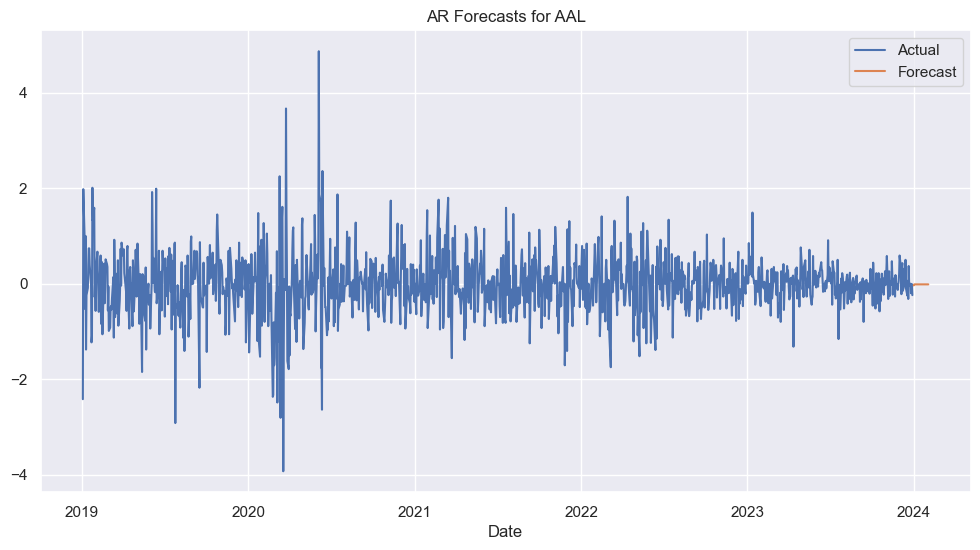

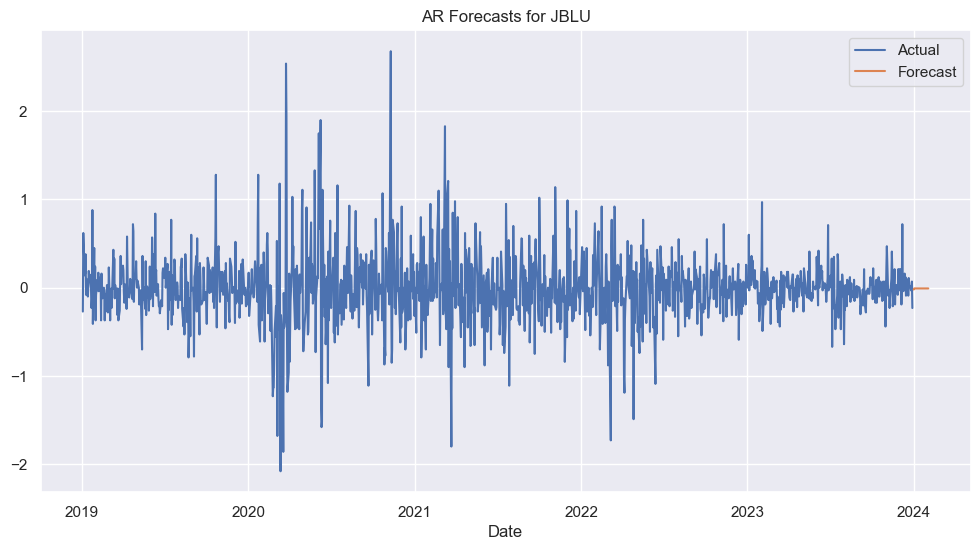

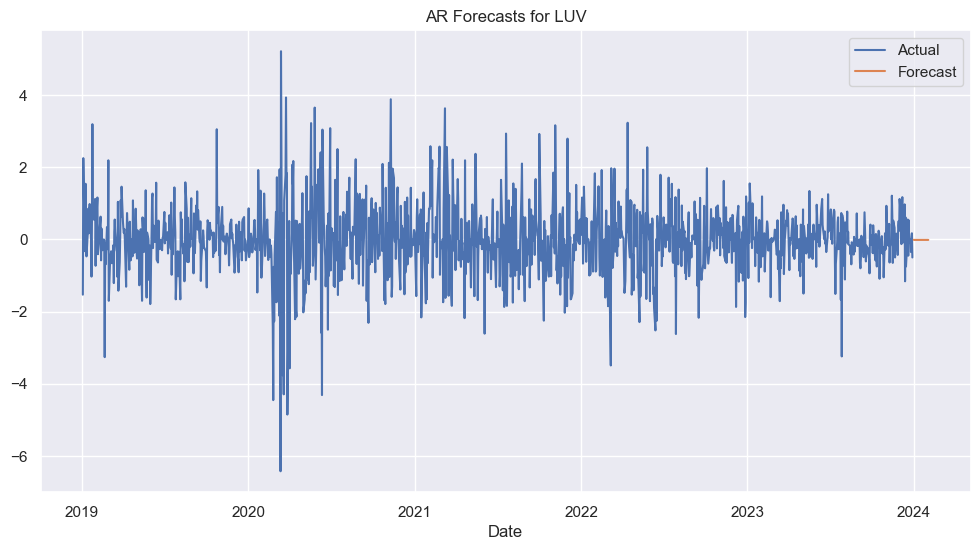

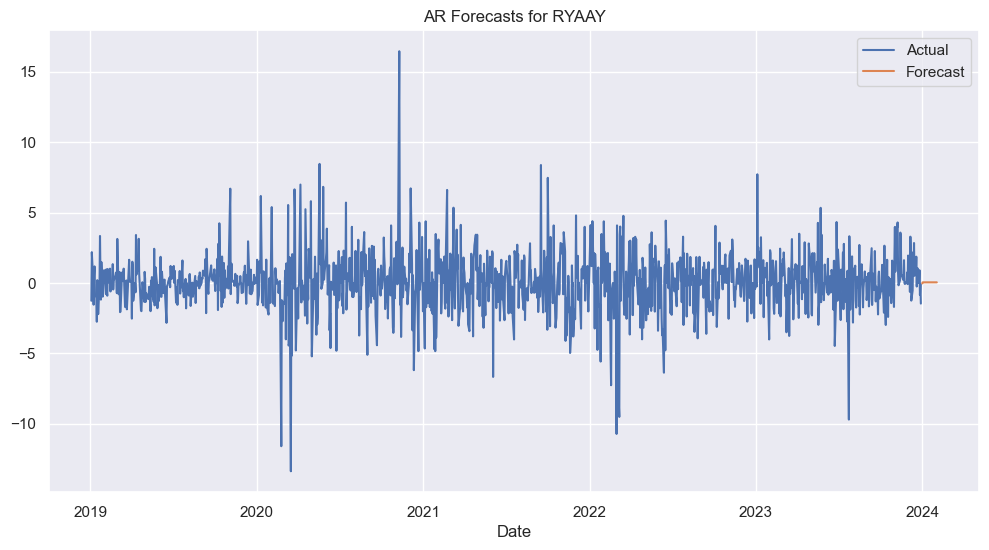

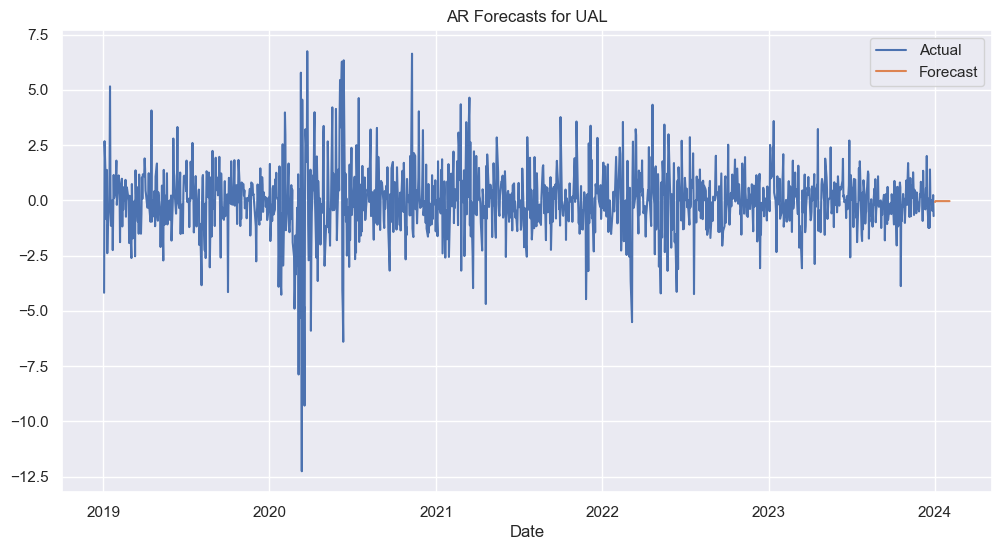

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

for column in airline_stock_prices_diff:
    # Fitting the AR model with order (1,0,0) 
    ma_model = ARIMA(airline_stock_prices_diff[column], order=(1,0,0))
    ma_result = ma_model.fit()

    # Forecasting the next 25 periods
    forecast_index = pd.date_range(start=airline_stock_prices_diff[column].index[-1], periods=26, freq='B')[1:]  # 'B' denotes business day frequency
    ma_forecast = ma_result.get_forecast(steps=25)
    ma_forecast_predicted_mean = ma_forecast.predicted_mean
    ma_forecast_predicted_mean.index = forecast_index
    
    # Plotting the actual data and the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(airline_stock_prices_diff[column].index, airline_stock_prices_diff[column], label='Actual')
    plt.plot(ma_forecast_predicted_mean.index, ma_forecast_predicted_mean, label='Forecast')
    plt.legend()
    plt.title(f'AR Forecasts for {column}')
    plt.xlabel('Date')
    plt.show()

### ARIMA Forecasting

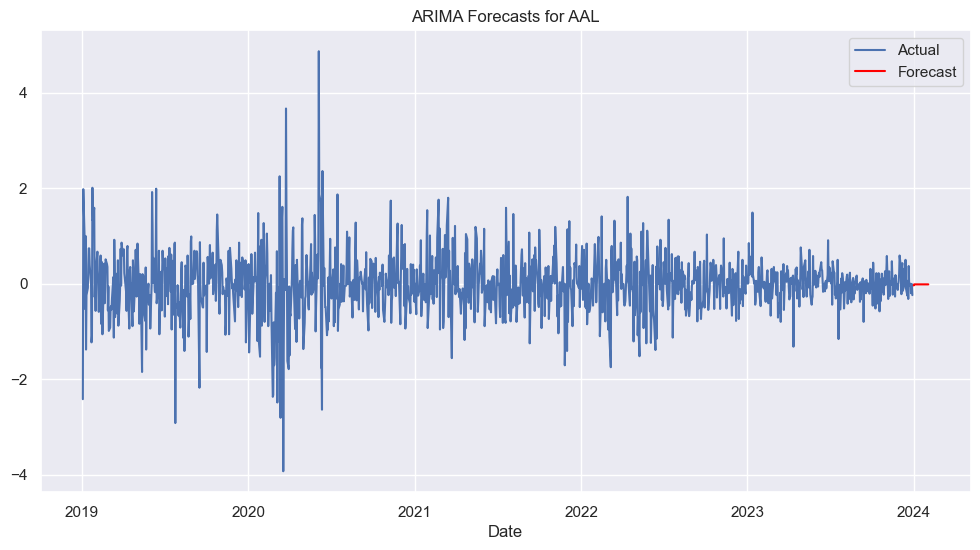

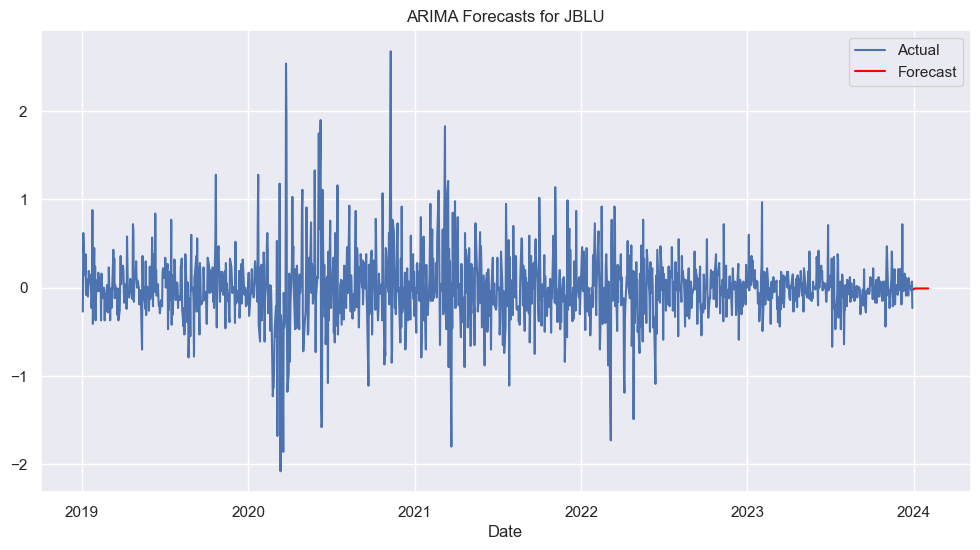

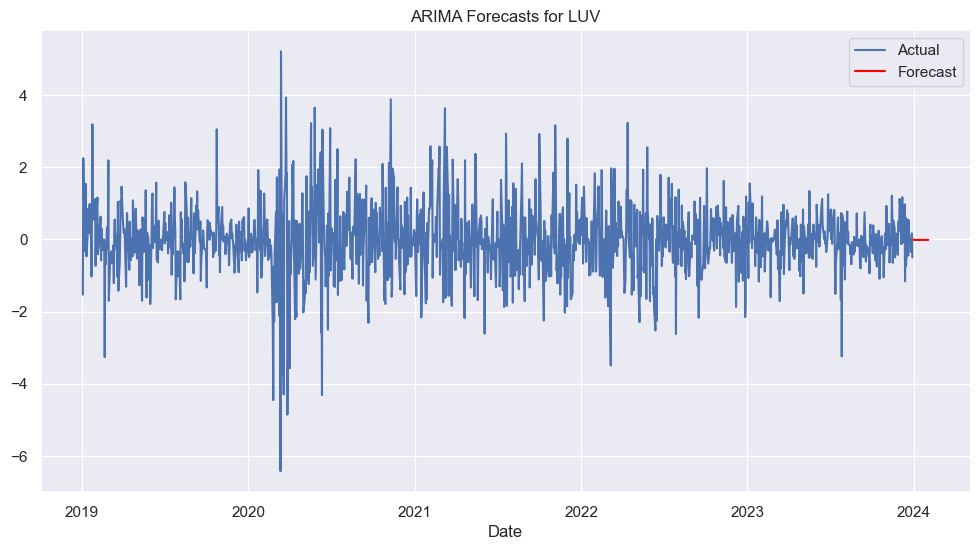

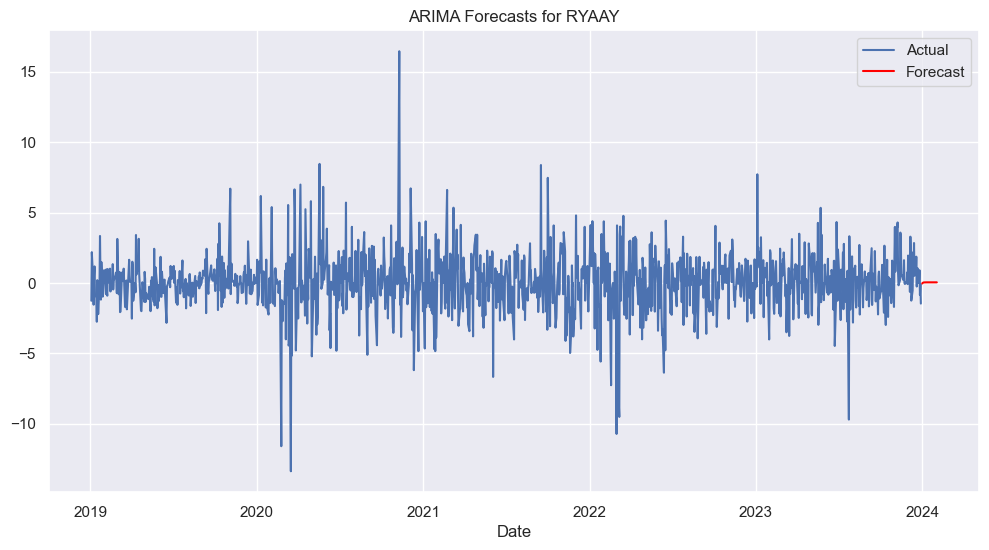

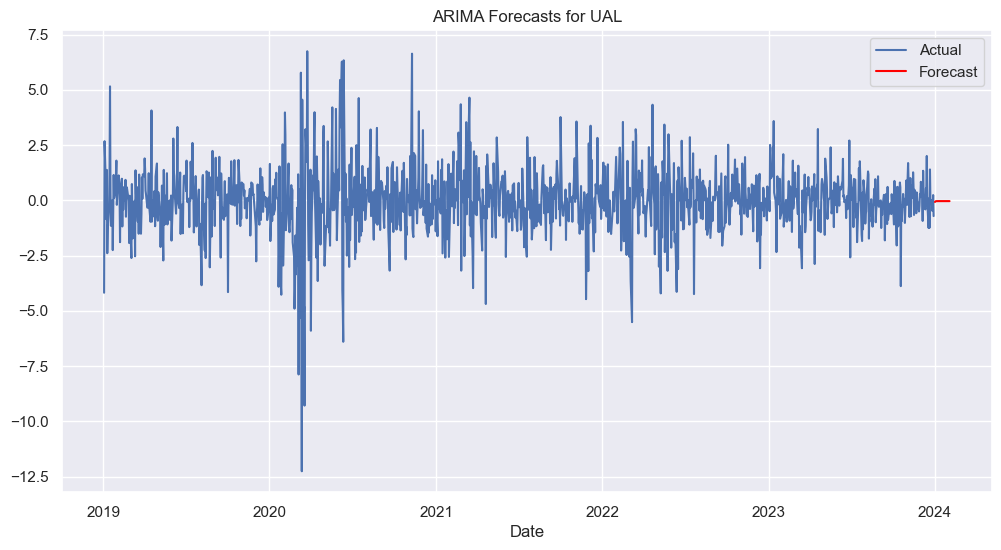

In [113]:
from statsmodels.tsa.arima.model import ARIMA

for column in airline_stock_prices_diff:
    # Checking for specific airline columns 
    if column in ['AAL', 'JBLU', 'LUV', 'RYAAY', 'UAL']:  
        arima_model = ARIMA(airline_stock_prices_diff[column], order=(1, 0, 1))
        arima_result = arima_model.fit()

        # Creating a forecast index starting the day after the last date in observed data and extending for 25 days
        # data index is a datetime type
        forecast_index = pd.date_range(start=airline_stock_prices_diff[column].index[-1], periods=26, freq='B')[1:]

        # Generating forecast
        arima_forecast = arima_result.get_forecast(steps=25)
        arima_forecast_predicted_mean = arima_forecast.predicted_mean
        arima_forecast_predicted_mean.index = forecast_index

        # Plotting the actual data and the forecast
        plt.figure(figsize=(12, 6))
        plt.plot(airline_stock_prices_diff[column].index, airline_stock_prices_diff[column], label='Actual')
        plt.plot(arima_forecast_predicted_mean.index, arima_forecast_predicted_mean, label='Forecast', color='red')
        plt.legend()
        plt.title(f'ARIMA Forecasts for {column}')
        plt.xlabel('Date')
        plt.show()

ARIMA Forecast for AAL:
The forecast for AAL is impressively stable, suggesting that despite past volatility, the airline's stock might be entering a period of stability. For investors or analysts, this model's output could be a sign that AAL has reached a mature phase in its business cycle, where extreme ups and downs become less frequent, potentially making it a more predictable investment.

ARIMA Forecast for JBLU:
JBLU’s forecast follows a similar pattern of stability, indicative of the model's confidence in the company's steady state moving forward. This might be interpreted as a signal that JBLU's operations and market position have become more predictable, which could be advantageous for long-term strategic planning.

ARIMA Forecast for LUV:
The ARIMA forecast for LUV also shows a level trend into the future. This could suggest that LUV has a strong underlying business model that is expected to hold steady, potentially a good sign for investors looking for stability in the often-volatile airline sector.

ARIMA Forecast for RYAAY:
RYAAY's forecast indicates little change expected in the near term, which could imply that RYAAY is perceived to be in a solid position, unaffected by short-term market noise. This might be beneficial for stakeholders who prefer minimal disruption and stable expectations.

ARIMA Forecast for UAL:
The forecast for UAL projects continuity and no dramatic shifts in the market's valuation of the airline. This steady outlook could be seen as a reflection of UAL's resilience and a potential indicator of its reliability as a long-term investment.

# SARIMA 

Fitting Auto-ARIMA for AAL
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2553.352, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2302.718, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2551.353, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2542.329, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2199.059, Time=4.96 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.50 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2206.703, Time=2.05 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2201.059, Time=3.15 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2201.059, Time=3.51 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2199.331, Time=2.57 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=2201.767, Time=5.67 sec
 ARIMA(1,0,0

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   8.479D-06   1.205D+00
  F =   1.2054439733351479     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


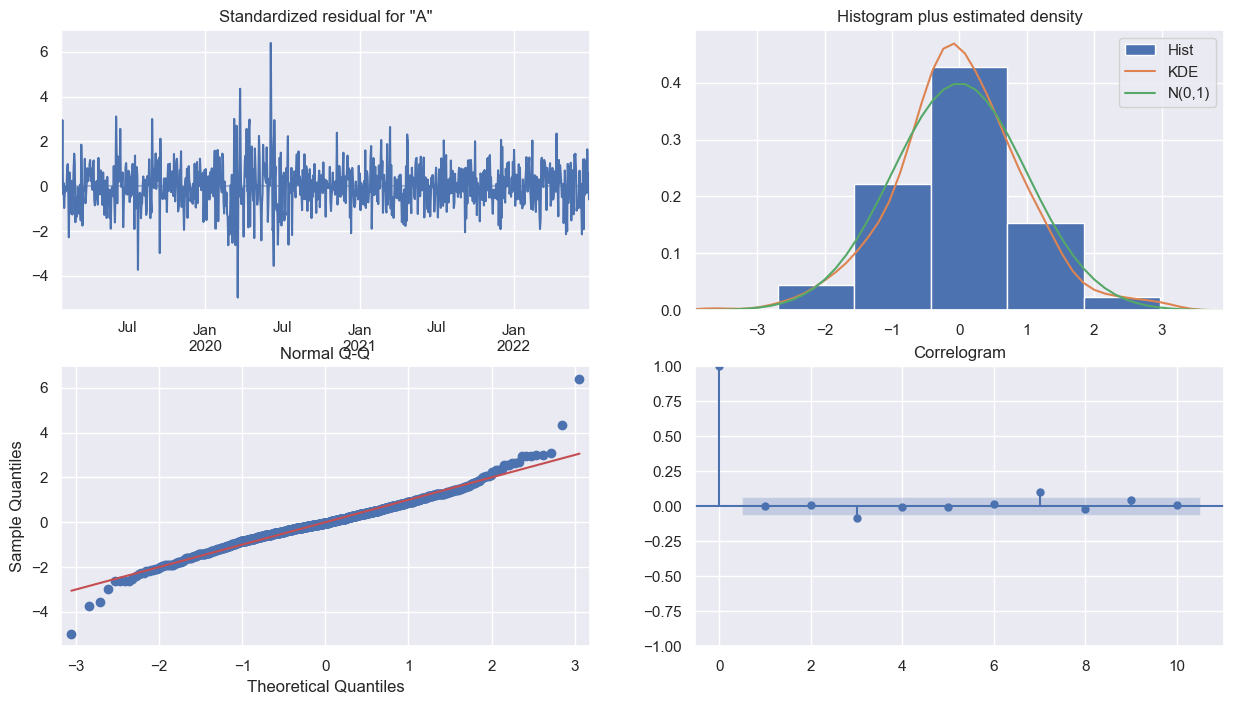

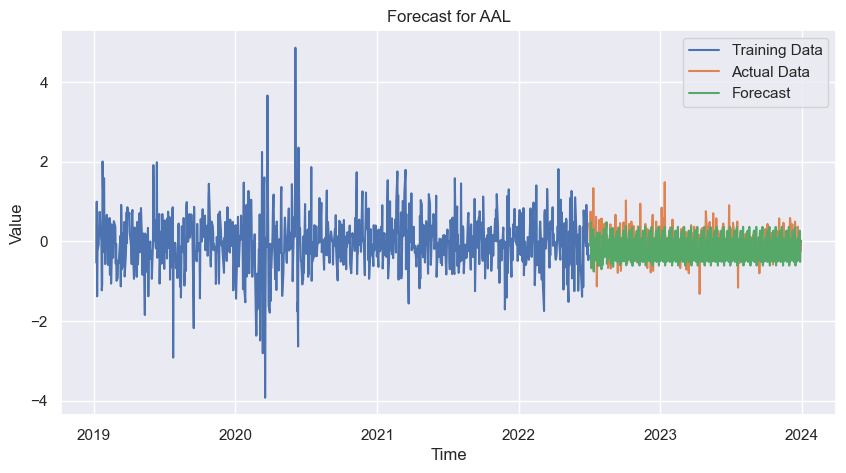

Performance Metrics for AAL:
Mean Squared Error (MSE): 0.2268041272586227
Mean Absolute Error (MAE): 0.383451503908823
Root Mean Squared Error (RMSE): 0.4762395691861636
Fitting Auto-ARIMA for JBLU
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1730.628, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1521.412, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1728.629, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1732.456, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1409.164, Time=3.51 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.00 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1409.521, Time=2.15 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1410.976, Time=3.34 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC

 This problem is unconstrained.



At iterate   10    f=  7.64127D-01    |proj g|=  5.69059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     13      1     0     0   2.117D-05   7.641D-01
  F =  0.76412650220905143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


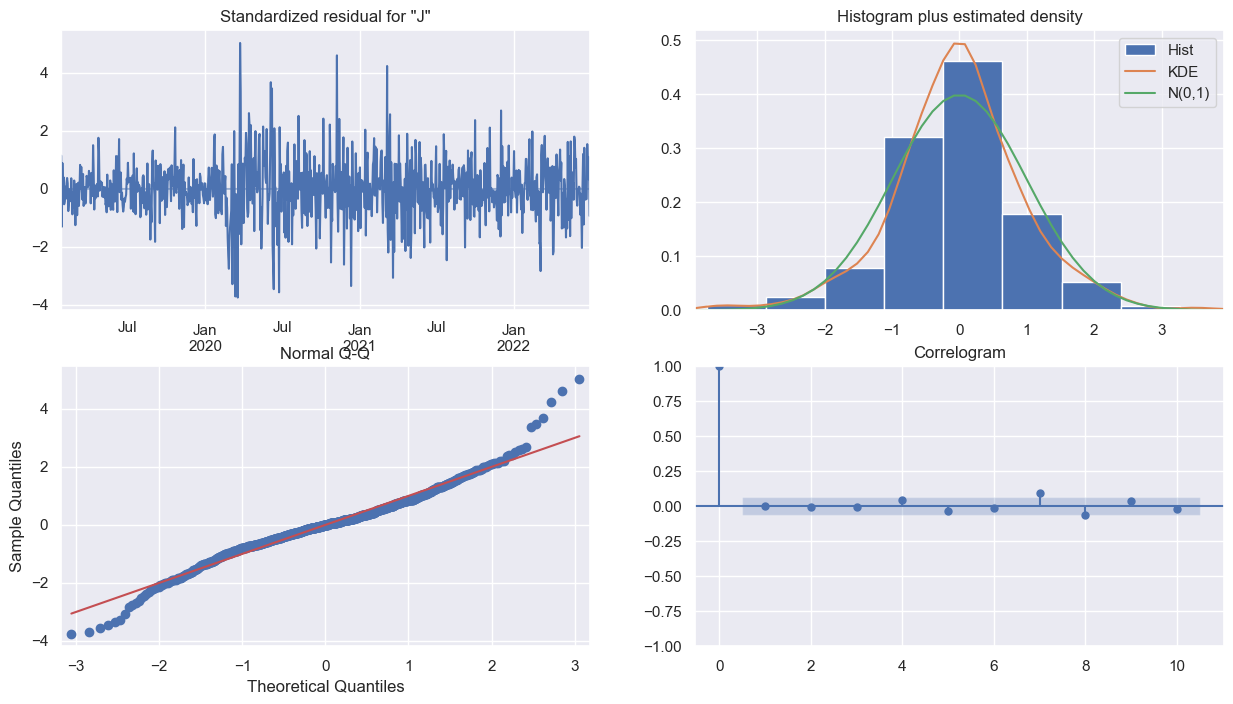

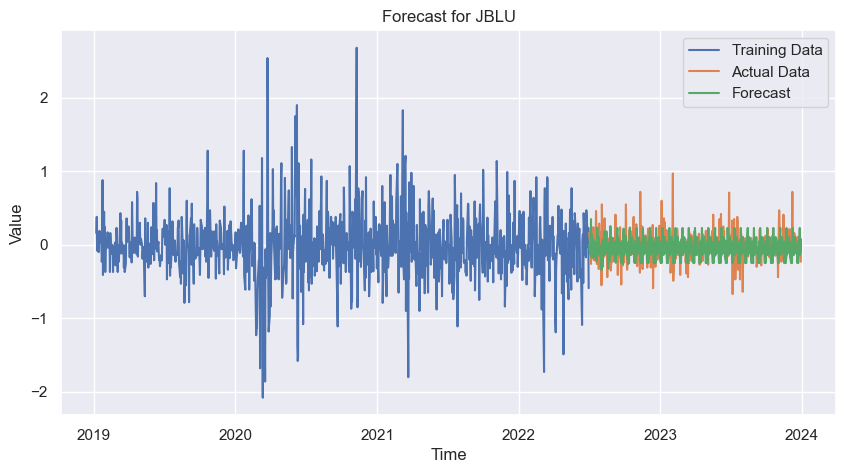

Performance Metrics for JBLU:
Mean Squared Error (MSE): 0.06384621214687021
Mean Absolute Error (MAE): 0.1987167664074846
Root Mean Squared Error (RMSE): 0.25267808006803877
Fitting Auto-ARIMA for LUV
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3267.323, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3067.237, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3265.332, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3268.108, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2980.930, Time=2.32 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.67 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2978.987, Time=2.31 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=3065.819, Time=0.20 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : 

 This problem is unconstrained.


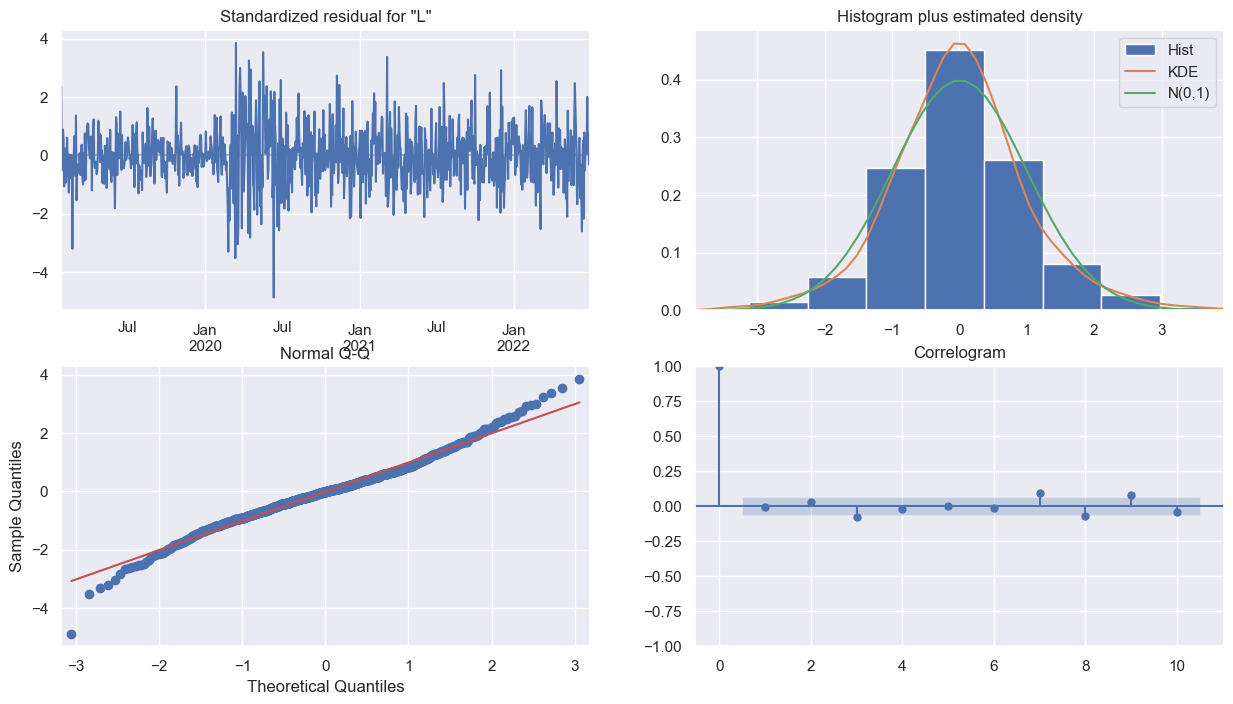

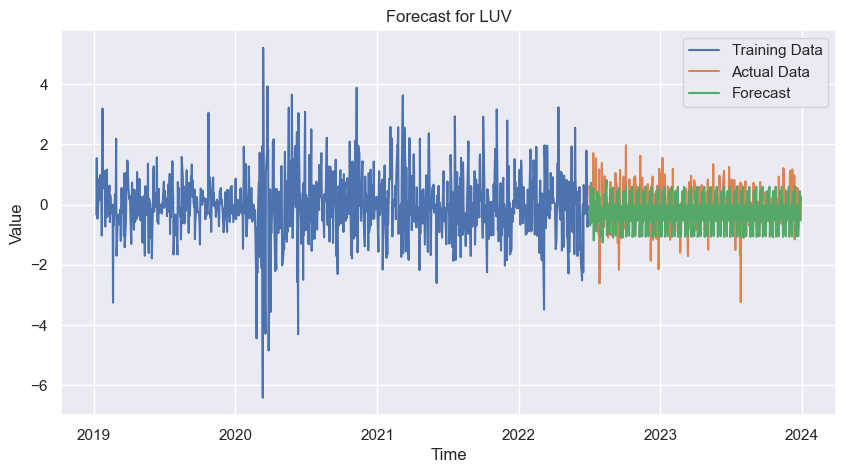

Performance Metrics for LUV:
Mean Squared Error (MSE): 0.7743829757708941
Mean Absolute Error (MAE): 0.6941135695711492
Root Mean Squared Error (RMSE): 0.8799903270893914
Fitting Auto-ARIMA for RYAAY
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4543.845, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4328.192, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4541.846, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4537.734, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4225.509, Time=3.23 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.20 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=4230.845, Time=1.97 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=4227.220, Time=2.77 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : A

 This problem is unconstrained.


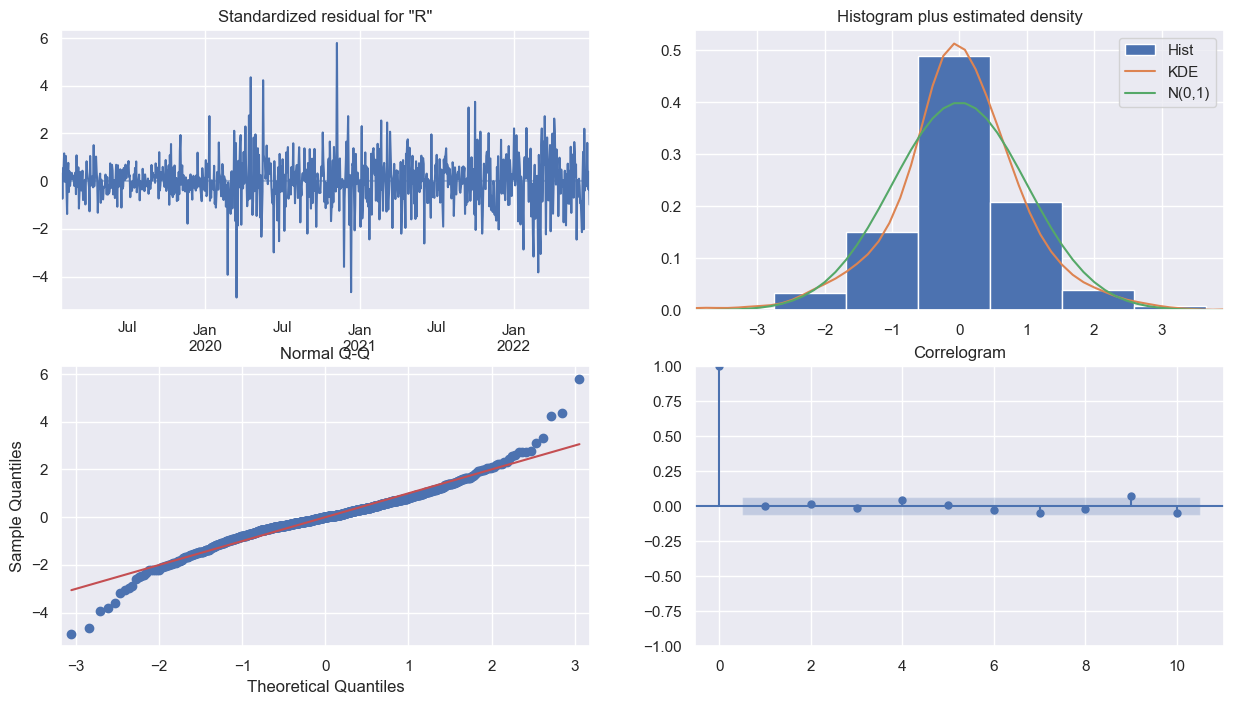

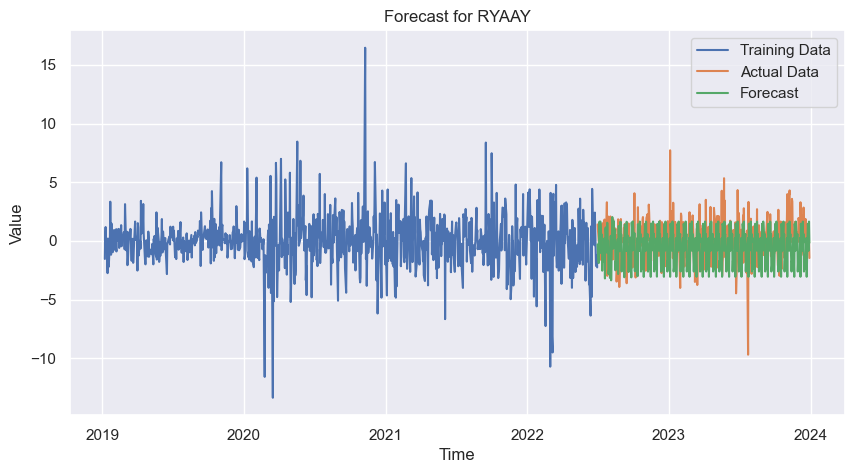

Performance Metrics for RYAAY:
Mean Squared Error (MSE): 5.853387275701544
Mean Absolute Error (MAE): 1.890592738080868
Root Mean Squared Error (RMSE): 2.419377456227437
Fitting Auto-ARIMA for UAL
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4093.746, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3877.714, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4091.746, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4095.718, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3745.054, Time=2.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.53 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3744.109, Time=1.93 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=3875.753, Time=0.18 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=

 This problem is unconstrained.


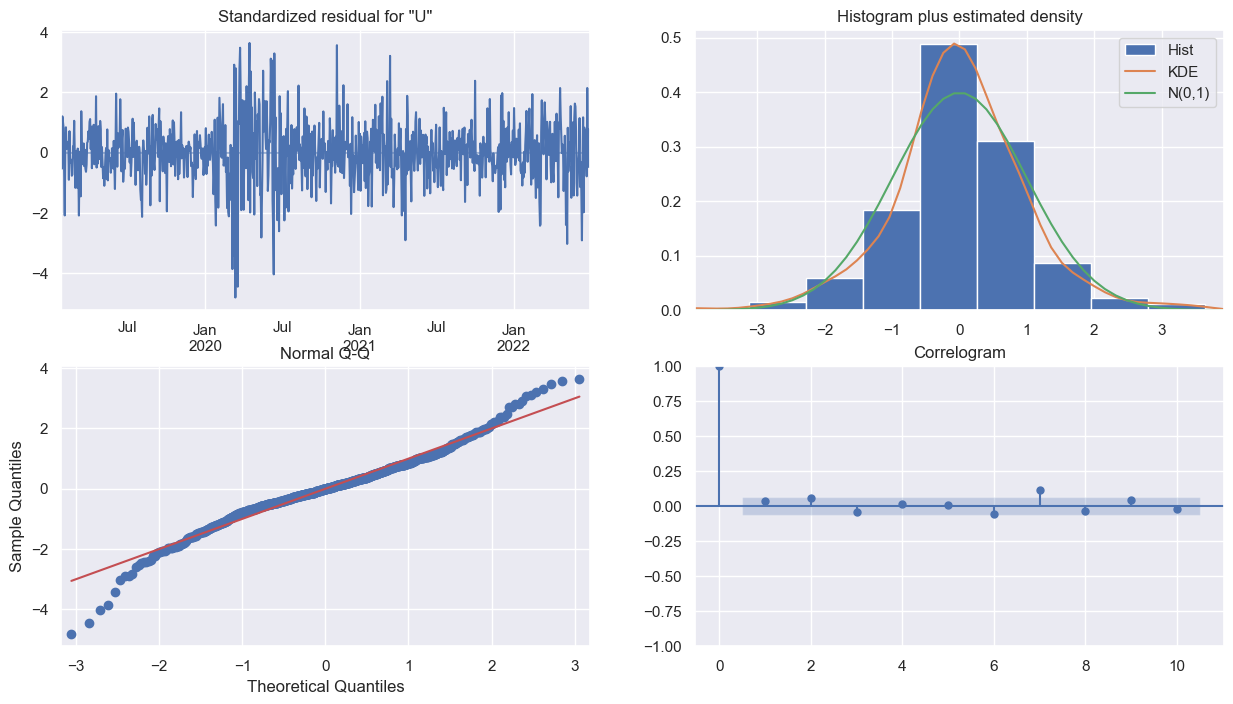

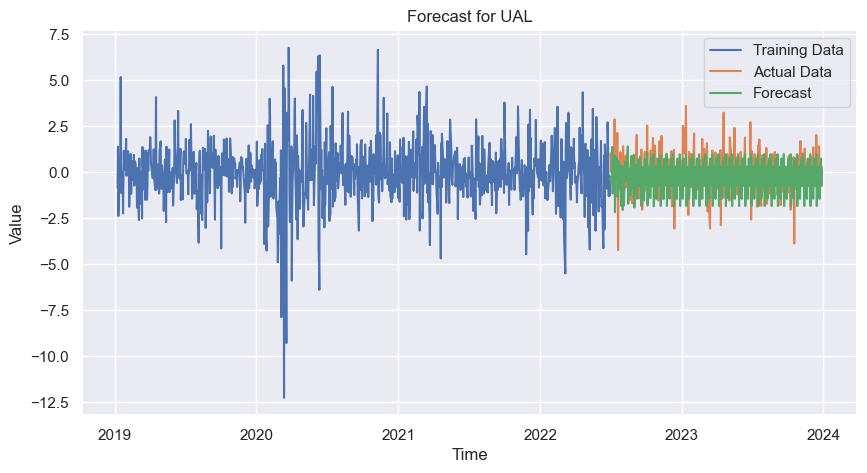

Performance Metrics for UAL:
Mean Squared Error (MSE): 1.9613802469426187
Mean Absolute Error (MAE): 1.1130828898729628
Root Mean Squared Error (RMSE): 1.400492858583227


In [114]:
from pmdarima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

#SARIMA PREDICTION
# Defining function to process, split, fit Auto-ARIMA
def process_split_fit_sarima(airline_stock_prices_diff, airline_name):
    # Splitting the data into train and test sets
    train_data = airline_stock_prices_diff[airline_name][3:int(len(airline_stock_prices_diff[airline_name]) * 0.7)]
    test_data = airline_stock_prices_diff[airline_name][int(len(airline_stock_prices_diff[airline_name]) * 0.7):]
    
    # Fit Auto-ARIMA model
    print(f'Fitting Auto-ARIMA for {airline_name}')
    model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                                 test='adf',       # use adftest to find optimal 'd'
                                 max_p=3, max_q=3, # maximum p and q
                                 m=12,             # frequency of series
                                 d=None,           # let model determine 'd'
                                 seasonal=True,    # Seasonality
                                 start_P=0, 
                                 D=1, 
                                 trace=True,
                                 error_action='ignore',  
                                 suppress_warnings=True, 
                                 stepwise=True)
    print(model_autoARIMA.summary())
    
    # Fitting SARIMA model based on Auto-ARIMA's suggested parameters
    order = model_autoARIMA.order
    seasonal_order = model_autoARIMA.seasonal_order
    print(f'Fitting SARIMA for {airline_name} with order {order}x{seasonal_order}')
    model_sarima = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    fitted_sarima = model_sarima.fit()
    

    fitted_sarima.plot_diagnostics(figsize=(15, 8))
    plt.show()
    
    # Sarima Forecasting
    forecast = fitted_sarima.forecast(steps=len(test_data))
    fc_series = pd.Series(forecast, index=test_data.index)

    # Plotting the forecast
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Actual Data')
    plt.plot(fc_series, label='Forecast')
    plt.title(f'Forecast for {airline_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Calculating performance metrics
    mse = mean_squared_error(test_data, fc_series)
    mae = mean_absolute_error(test_data, fc_series)
    rmse = math.sqrt(mse)
    mape = np.mean(np.abs(fc_series - test_data) / np.abs(test_data))
    
    print(f'Performance Metrics for {airline_name}:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')


for airline in airline_stock_prices_diff.keys():
    process_split_fit_sarima(airline_stock_prices_diff, airline)


Forecast for AAL:
The SARIMA forecast for AAL appears to be stable and consistent, with the model predicting a steadiness in the time series that could be reflective of an underlying equilibrium level in the stock price. The model seems to be well-calibrated to avoid overfitting to the historical volatility, which could be beneficial for longer-term investment strategies focusing on stability rather than short-term fluctuations.

Forecast for JBLU:
The forecast for JBLU also exhibits a stable prediction, suggesting that the model has identified a solid mean level around which the stock price oscillates. This consistency in the forecast could be useful for investors or analysts interested in the general direction of the stock price, rather than intricate short-term movements.

Forecast for LUV:
The LUV forecast, while flat, suggests that the model is capturing a long-term mean, which could be indicative of the stock's intrinsic value according to the information available up to the end of the training period. This could be particularly useful for strategic planning or long-term budgeting, where stability and avoidance of overreacting to market noise are important.

Forecast for RYAAY:
The forecast for RYAAY, maintaining a level prediction, could be seen as an indicator that the airline has reached a stable phase without expectation of sudden changes in the near term. This might be seen as a positive sign of resilience or stabilization in an industry known for its volatility.

Forecast for UAL:
The UAL forecast follows the same pattern of stability as the others. This could be interpreted as a sign that the model is picking up on a long-term equilibrium level, which could be helpful for investors who are more risk-averse and prefer stability in their investment portfolio.